## Musket Football Team Data Analysis Project

### Context:
The Muskets Football team is preparing for the next games season and needs help in cleaning and preprocessing have asked their data and hopefully help predict number of hits by each player.

#### TASK: 
1. Conduct a full range cleaning of the data. Provide explanations and justifications for any actions taken. 
2. Preprocess the cleaned data from task 1 above and transform it into a well behaved data. 
3. Select input features for an outcome feature of HITS. 
#### Sub Tasks 
1. Extract the player names from the PlayerUrl column and create a new column name Player Name from the extracts 
2. Create a new column titled Player Status from the CONTRACT column with 3 labels: 
    a. 'Active' If the player has an active contract 
    b. 'Free', if the player is free 
    c. 'On Loan' if the player is on loan 
3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean values in the columns for each player as appropriate. Name the columns the play position 
4. Weight and Height, W/F, SM and IR Columns: convert to integers 
5. Value, Wage and Release Clause columns: convert to Float 
6. Inspect the HITS column and ensure its float 
7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into which you convert the respective values into clusters/labels as follows: 
    a. Height: Bucket intervals of 10 years 
    b. Weight: Bucket intervals of 10 kg 
    c. Wage: bucket intervals of 50K 
    d. Value: bucket intervals of 50M 
    e. Release Clause: bucket intervals of 50M 
##### BONUS: 
Build a prediction model to predict the number of Hits of each payer

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Muskets_teamData_V2.csv')

In [3]:
team_data = data.copy()

### Data Exploration

In [4]:
team_data.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33  93.0   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35  92.0   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27  91.0   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29  91.0   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28  91.0   

    POT                         Club     Contract   Positions Height Weight  \
0  93.0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg   
1  92.0             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  187cm   83kg   
2  93.0      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  188cm   87kg   
3  91.0      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  181cm   70kg   
4  91.0  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  175cm   68kg   

  Preferred Foot  BOV Best Position     Joined Loan Date End    Value   Wage  \
0           Left   93            RW   1-Jul-04           NaN  €103.5M  €560K   
1          Right   92            ST  10-Jul-18           NaN     €63M  €220K   
2          Right   91            GK  16-Jul-14           NaN    €120M  €125K   
3          Right   91           CAM  30-Aug-15           NaN    €129M  €370K   
4          Right   91            LW   3-Aug-17           NaN    €132M  €270K   

  Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0        €138.4M      429.0      85.0       95.0              70.0   
1         €75.9M      437.0      84.0       95.0              90.0   
2        €159.4M       95.0      13.0       11.0              15.0   
3          €161M      407.0      94.0       82.0              55.0   
4        €166.5M      408.0      85.0       87.0              62.0   

  Short Passing  Volleys  Skill Dribbling  Curve  FK Accuracy  Long Passing  \
0            91     88.0  470.0        96   93.0         94.0          91.0   
1            82     86.0  414.0        88   81.0         76.0          77.0   
2            43     13.0  109.0        12   13.0         14.0          40.0   
3            94     82.0  441.0        88   85.0         83.0          93.0   
4            87     87.0  448.0        95   88.0         89.0          81.0   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0          96.0     451.0          91.0          80.0     91.0       94.0   
1          92.0     431.0          87.0          91.0     87.0       95.0   
2          30.0     307.0          43.0          60.0     67.0       88.0   
3          92.0     398.0          77.0          76.0     78.0       91.0   
4          95.0     453.0          94.0          89.0     96.0       91.0   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     95.0  389.0        86.0     68.0     72.0      69.0        94.0   
1     71.0  444.0        94.0     95.0     84.0      78.0        93.0   
2     49.0  268.0        59.0     78.0     41.0      78.0        12.0   
3     76.0  408.0        91.0     63.0     89.0      74.0        91.0   
4     83.0  357.0        80.0     62.0     81.0      50.0        84.0   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \

In [5]:
team_data.shape

(19021, 77)

- 19021 entries and 77 features.

In [6]:
team_data.isna().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             5
DRI             2
DEF             5
PHY             1
Hits         2595
Length: 77, dtype: int64

In [7]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

- Height, weight, Value, wage, release clause, short passing, dribbling, W/F, SM, IR and Hits are not in appropriate data types.

### Data Cleaning and Preprocessng

#### Treating Duplicates:

In [8]:
team_data.duplicated().sum()

42

In [9]:
team_data.drop_duplicates(keep='first', inplace=True)
team_data.reset_index(drop=True, inplace=True)

In [10]:
team_data.duplicated().sum()

0

#### Checking Features containing Null Values:

In [11]:
null_dict = {}
for col in team_data.columns:
    if team_data[col].isna().any():
        null_dict[col] = team_data[col].isna().sum()
print(f'There are a total of {len(null_dict.keys())} features containing null values.')
print('=' * 100)
print(null_dict)

There are a total of 52 features containing null values.
{'↓OVA': 2, 'POT': 1, 'Weight': 1, 'Loan Date End': 17966, 'Release Clause': 3, 'Attacking': 1, 'Crossing': 1, 'Finishing': 5, 'Heading Accuracy': 8, 'Short Passing': 9, 'Volleys': 7, 'Skill': 6, 'Dribbling': 1, 'Curve': 8, 'FK Accuracy': 6, 'Long Passing': 3, 'Ball Control': 3, 'Movement': 5, 'Acceleration': 4, 'Sprint Speed': 3, 'Agility': 2, 'Reactions': 4, 'Balance': 7, 'Power': 1, 'Shot Power': 2, 'Jumping': 4, 'Stamina': 1, 'Strength': 5, 'Long Shots': 7, 'Mentality': 6, 'Interceptions': 4, 'Positioning': 1, 'Penalties': 1, 'Composure': 1, 'Defending': 1, 'Marking': 2, 'Standing Tackle': 3, 'Sliding Tackle': 1, 'Goalkeeping': 3, 'GK Diving': 1, 'GK Handling': 1, 'GK Kicking': 2, 'GK Positioning': 2, 'Total Stats': 1, 'D/W': 1, 'PAC': 3, 'SHO': 3, 'PAS': 5, 'DRI': 2, 'DEF': 5, 'PHY': 1, 'Hits': 2595}


#### Casting into appropriate data types:
Height, weight, Value, wage, release clause, short passing, dribbling, W/F, SM, IR and Hits are not in appropriate data types.

In [12]:
col_list = ['Height', 'Weight', 'Value', 'W/F', 'SM', 'IR', 'Short Passing', 'Release Clause', 'Wage', 'Dribbling', 'Hits']

In [13]:
team_data[col_list]

Height Weight    Value  W/F  SM   IR Short Passing Release Clause  \
0      170cm   72kg  €103.5M  4 ★  4★  5 ★            91        €138.4M   
1      187cm   83kg     €63M  4 ★  5★  5 ★            82         €75.9M   
2      188cm   87kg    €120M  3 ★  1★  3 ★            43        €159.4M   
3      181cm   70kg    €129M  5 ★  4★  4 ★            94          €161M   
4      175cm   68kg    €132M  5 ★  5★  5 ★            87        €166.5M   
...      ...    ...      ...  ...  ..  ...           ...            ...   
18974  178cm   66kg    €100K  2 ★  2★  1 ★          26.0           €70K   
18975  175cm   65kg    €130K  2 ★  2★  1 ★          56.0          €165K   
18976  179cm   74kg    €120K  2 ★  2★  1 ★          54.0          €131K   
18977  175cm   69kg    €100K  3 ★  2★  1 ★          42.0           €88K   
18978  188cm   75kg    €100K  3 ★  2★  1 ★          45.0           €79K   

        Wage Dribbling Hits  
0      €560K        96  771  
1      €220K        88  562  
2      €125K        12  150  
3      €370K        88  207  
4      €270K        95  595  
...      ...       ...  ...  
18974    €1K        27  NaN  
18975   €500        46  NaN  
18976   €500        43  NaN  
18977    €2K        51  NaN  
18978    €1K        40  NaN  

[18979 rows x 11 columns]

In [14]:
team_data[col_list].dtypes

Height            object
Weight            object
Value             object
W/F               object
SM                object
IR                object
Short Passing     object
Release Clause    object
Wage              object
Dribbling         object
Hits              object
dtype: object

### Height

In [15]:
team_data[col_list]['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [16]:
new_height = []
for height in team_data['Height']:
    if str(height).endswith('"'):
        num = int(str(height).split('\'')[0])
        den = int(str(str(height).split('\'')[1]).split('"')[0])
        if den == 0:
            cm = int(num * 30.48)
            new_height.append(int(cm))
        else:
            cm = int((num + (den / 12)) * 30.48)
            new_height.append(cm)
    elif str(height).endswith('cm'):
        cm = int(str(height).split('cm')[0])
        new_height.append(int(cm))

In [17]:
len(new_height) == len(team_data['Height'])

True

In [18]:
for content in new_height:
    if type(content) != int:
        print('Non integer found.')
    else:
        continue

In [19]:
team_data['Height'] = new_height
team_data[col_list].sample(10)

Height Weight   Value  W/F  SM   IR Short Passing Release Clause  Wage  \
15164     184   76kg   €240K  4 ★  2★  1 ★            57          €310K  €750   
10307     179   78kg   €950K  3 ★  2★  1 ★            55          €996K   €1K   
14977     185   82kg   €600K  3 ★  3★  1 ★            51          €844K  €750   
5528      192   85kg   €450K  3 ★  1★  1 ★            23          €1.2M  €500   
4372      188   70kg   €2.2M  4 ★  2★  2 ★            63          €5.1M  €17K   
230       174   72kg  €30.5M  4 ★  5★  3 ★            79         €31.5M  €26K   
3375      188   83kg   €1.2M  1 ★  1★  1 ★            19          €3.6M  €12K   
12323     193   89kg    €50K  2 ★  1★  1 ★            25           €56K  €900   
18417     184   78kg   €200K  3 ★  2★  1 ★          52.0          €188K  €800   
12084     187   77kg   €500K  4 ★  3★  1 ★            62             €0   €2K   

      Dribbling Hits  
15164        53    1  
10307        66    8  
14977        61    9  
5528         13    3  
4372         65   46  
230          83  159  
3375          8    2  
12323        14    2  
18417        40  NaN  
12084        62    1

- Height casted to integers.

#### Weight:

In [20]:
# Weight:
team_data[col_list]['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [21]:
new_weight = []
for weight in team_data['Weight']:
    if str(weight).endswith('kg'):
        value = int(weight[:-2])
        new_weight.append(value)
    elif str(weight).endswith('lbs'):
        value = int(int(weight[:-3]) * 0.453592)
        new_weight.append(int(value))
    else:
        try:
            new_weight.append(int(weight))
        except ValueError:
            new_weight.append(weight)
            
team_data['Weight'] = new_weight

In [22]:
#len(new_weight)==len(team_data['Weight'])

In [23]:
team_data[col_list]

Height  Weight    Value  W/F  SM   IR Short Passing Release Clause  \
0         170    72.0  €103.5M  4 ★  4★  5 ★            91        €138.4M   
1         187    83.0     €63M  4 ★  5★  5 ★            82         €75.9M   
2         188    87.0    €120M  3 ★  1★  3 ★            43        €159.4M   
3         181    70.0    €129M  5 ★  4★  4 ★            94          €161M   
4         175    68.0    €132M  5 ★  5★  5 ★            87        €166.5M   
...       ...     ...      ...  ...  ..  ...           ...            ...   
18974     178    66.0    €100K  2 ★  2★  1 ★          26.0           €70K   
18975     175    65.0    €130K  2 ★  2★  1 ★          56.0          €165K   
18976     179    74.0    €120K  2 ★  2★  1 ★          54.0          €131K   
18977     175    69.0    €100K  3 ★  2★  1 ★          42.0           €88K   
18978     188    75.0    €100K  3 ★  2★  1 ★          45.0           €79K   

        Wage Dribbling Hits  
0      €560K        96  771  
1      €220K        88  562  
2      €125K        12  150  
3      €370K        88  207  
4      €270K        95  595  
...      ...       ...  ...  
18974    €1K        27  NaN  
18975   €500        46  NaN  
18976   €500        43  NaN  
18977    €2K        51  NaN  
18978    €1K        40  NaN  

[18979 rows x 11 columns]

- Weight is still in float due to null value present in the feature. This will be treated later on.

#### Value:

In [24]:
# Value:
team_data['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [25]:
value = []
for entry in team_data['Value']:
    if str(entry).endswith('M'):
        entry = float(entry[1:-1]) * 1000000
        value.append(entry)
    elif str(entry).endswith('K'):
        entry = float(entry[1:-1]) * 1000
        value.append(entry)
    elif entry == '€0':
        value.append(float(entry[1]))
    else:
        value.append(entry)
        
team_data['Value'] = value

In [26]:
team_data[col_list]

Height  Weight        Value  W/F  SM   IR Short Passing Release Clause  \
0         170    72.0  103500000.0  4 ★  4★  5 ★            91        €138.4M   
1         187    83.0   63000000.0  4 ★  5★  5 ★            82         €75.9M   
2         188    87.0  120000000.0  3 ★  1★  3 ★            43        €159.4M   
3         181    70.0  129000000.0  5 ★  4★  4 ★            94          €161M   
4         175    68.0  132000000.0  5 ★  5★  5 ★            87        €166.5M   
...       ...     ...          ...  ...  ..  ...           ...            ...   
18974     178    66.0     100000.0  2 ★  2★  1 ★          26.0           €70K   
18975     175    65.0     130000.0  2 ★  2★  1 ★          56.0          €165K   
18976     179    74.0     120000.0  2 ★  2★  1 ★          54.0          €131K   
18977     175    69.0     100000.0  3 ★  2★  1 ★          42.0           €88K   
18978     188    75.0     100000.0  3 ★  2★  1 ★          45.0           €79K   

        Wage Dribbling Hits  
0      €560K        96  771  
1      €220K        88  562  
2      €125K        12  150  
3      €370K        88  207  
4      €270K        95  595  
...      ...       ...  ...  
18974    €1K        27  NaN  
18975   €500        46  NaN  
18976   €500        43  NaN  
18977    €2K        51  NaN  
18978    €1K        40  NaN  

[18979 rows x 11 columns]

### W/F, SM and IR:

In [27]:
# W/F, SM and IR:
W_F = [int(a[:-1]) for a in team_data['W/F']]
SM = [int(b[:-1]) for b in team_data['SM']]
IR = [int(c[:-1]) for c in team_data['IR']]

team_data['W/F'] = W_F
team_data['SM'] = SM
team_data['IR'] = IR

In [28]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR Short Passing Release Clause  \
0         170    72.0  103500000.0    4   4   5            91        €138.4M   
1         187    83.0   63000000.0    4   5   5            82         €75.9M   
2         188    87.0  120000000.0    3   1   3            43        €159.4M   
3         181    70.0  129000000.0    5   4   4            94          €161M   
4         175    68.0  132000000.0    5   5   5            87        €166.5M   
...       ...     ...          ...  ...  ..  ..           ...            ...   
18974     178    66.0     100000.0    2   2   1          26.0           €70K   
18975     175    65.0     130000.0    2   2   1          56.0          €165K   
18976     179    74.0     120000.0    2   2   1          54.0          €131K   
18977     175    69.0     100000.0    3   2   1          42.0           €88K   
18978     188    75.0     100000.0    3   2   1          45.0           €79K   

        Wage Dribbling Hits  
0      €560K        96  771  
1      €220K        88  562  
2      €125K        12  150  
3      €370K        88  207  
4      €270K        95  595  
...      ...       ...  ...  
18974    €1K        27  NaN  
18975   €500        46  NaN  
18976   €500        43  NaN  
18977    €2K        51  NaN  
18978    €1K        40  NaN  

[18979 rows x 11 columns]

#### Short Passing:

In [29]:
team_data['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '24', '36', '51', '17', '18', '39', '71',
       '67', '27', '72', '66', '20', '31', '68', '29', '11', '64', '62',
       nan, '41', '63', '19', '54', '16', '69_', '22', '49', '59', '14',
       '58', '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70,
       67, 66, 57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62,
       47, 22, 52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 69, 50, 75, 29,
       36, 41, 32, 53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38,
       20, 13, 39, 49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [30]:
short_pass = []
for entry in team_data['Short Passing']:
    if str(entry).endswith('_'):
        entry = int(entry[:-1])
        short_pass.append(entry)
    else:
        try:
            short_pass.append(int(entry))
        except:
            short_pass.append(entry)

In [31]:
team_data['Short Passing'] = short_pass 

In [32]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR  Short Passing Release Clause  \
0         170    72.0  103500000.0    4   4   5           91.0        €138.4M   
1         187    83.0   63000000.0    4   5   5           82.0         €75.9M   
2         188    87.0  120000000.0    3   1   3           43.0        €159.4M   
3         181    70.0  129000000.0    5   4   4           94.0          €161M   
4         175    68.0  132000000.0    5   5   5           87.0        €166.5M   
...       ...     ...          ...  ...  ..  ..            ...            ...   
18974     178    66.0     100000.0    2   2   1           26.0           €70K   
18975     175    65.0     130000.0    2   2   1           56.0          €165K   
18976     179    74.0     120000.0    2   2   1           54.0          €131K   
18977     175    69.0     100000.0    3   2   1           42.0           €88K   
18978     188    75.0     100000.0    3   2   1           45.0           €79K   

        Wage Dribbling Hits  
0      €560K        96  771  
1      €220K        88  562  
2      €125K        12  150  
3      €370K        88  207  
4      €270K        95  595  
...      ...       ...  ...  
18974    €1K        27  NaN  
18975   €500        46  NaN  
18976   €500        43  NaN  
18977    €2K        51  NaN  
18978    €1K        40  NaN  

[18979 rows x 11 columns]

#### Release Clause:

In [33]:
# Release Clause:
clause = []
for entry in team_data['Release Clause']:
    if str(entry).endswith('M'):
        entry = float(entry[1:-1]) * 1000000
        clause.append(entry)
    elif str(entry).endswith('K'):
        entry = float(entry[1:-1]) * 1000
        clause.append(entry)
    elif entry == '€0':
        clause.append(float(entry[1:]))
    else:
        clause.append(entry)
        
team_data['Release Clause'] = clause

In [34]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR  Short Passing  \
0         170    72.0  103500000.0    4   4   5           91.0   
1         187    83.0   63000000.0    4   5   5           82.0   
2         188    87.0  120000000.0    3   1   3           43.0   
3         181    70.0  129000000.0    5   4   4           94.0   
4         175    68.0  132000000.0    5   5   5           87.0   
...       ...     ...          ...  ...  ..  ..            ...   
18974     178    66.0     100000.0    2   2   1           26.0   
18975     175    65.0     130000.0    2   2   1           56.0   
18976     179    74.0     120000.0    2   2   1           54.0   
18977     175    69.0     100000.0    3   2   1           42.0   
18978     188    75.0     100000.0    3   2   1           45.0   

       Release Clause   Wage Dribbling Hits  
0         138400000.0  €560K        96  771  
1          75900000.0  €220K        88  562  
2         159400000.0  €125K        12  150  
3         161000000.0  €370K        88  207  
4         166500000.0  €270K        95  595  
...               ...    ...       ...  ...  
18974         70000.0    €1K        27  NaN  
18975        165000.0   €500        46  NaN  
18976        131000.0   €500        43  NaN  
18977         88000.0    €2K        51  NaN  
18978         79000.0    €1K        40  NaN  

[18979 rows x 11 columns]

### Wage:

In [35]:
team_data['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

- All wages ends with 'K' except does with 0 euros (perhaps are retired or no club).
- Some entries with wages less than 1000 euros (650, 600, etc) were entered. This may have been a mistake because from the value we see they are highly valued. Hence these entries will be replaced with null values and then predicted.

In [36]:
team_data[team_data['Wage']=='€850']

ID           Name            LongName  \
697    244467       O. Kolář        Ondřej Kolář   
1975   218621     F. Sánchez     Facundo Sánchez   
2055   219911  T. Hlatshwayo  Thulani Hlatshwayo   
2168   180808      O. Kúdela       Ondřej Kúdela   
2270   240033     D. Hovorka       David Hovorka   
...       ...            ...                 ...   
18731  244961     T. Johnson      Travis Johnson   
18732  241638      B. Worman          Ben Worman   
18743  256553     A. Garrido      Álvaro Garrido   
18766  242731       D. Csóka        Dániel Csóka   
18857  251112    Huang Zihao         Zihao Huang   

                                               photoUrl  \
697    https://cdn.sofifa.com/players/244/467/21_60.png   
1975   https://cdn.sofifa.com/players/218/621/21_60.png   
2055   https://cdn.sofifa.com/players/219/911/21_60.png   
2168   https://cdn.sofifa.com/players/180/808/21_60.png   
2270   https://cdn.sofifa.com/players/240/033/21_60.png   
...                                                 ...   
18731  https://cdn.sofifa.com/players/244/961/21_60.png   
18732  https://cdn.sofifa.com/players/241/638/21_60.png   
18743  https://cdn.sofifa.com/players/256/553/21_60.png   
18766  https://cdn.sofifa.com/players/242/731/21_60.png   
18857  https://cdn.sofifa.com/players/251/112/21_60.png   

                                               playerUrl     Nationality  Age  \
697    http://sofifa.com/player/244467/ondrej-kolar/2...  Czech Republic   25   
1975   http://sofifa.com/player/218621/facundo-sanche...       Argentina   30   
2055   http://sofifa.com/player/219911/thulani-hlatsh...    South Africa   30   
2168   http://sofifa.com/player/180808/ondrej-kudela/...  Czech Republic   33   
2270   http://sofifa.com/player/240033/david-hovorka/...  Czech Republic   26   
...                                                  ...             ...  ...   
18731  http://sofifa.com/player/244961/travis-johnson...         England   19   
18732  http://sofifa.com/player/241638/ben-worman/210...         England   18   
18743  http://sofifa.com/player/256553/alvaro-garrido...           Chile   20   
18766  http://sofifa.com/player/242731/daniel-csoka/2...         Hungary   20   
18857  http://sofifa.com/player/251112/zihao-huang/21...        China PR   19   

       ↓OVA   POT                       Club     Contract    Positions  \
697    78.0  83.0    \n\n\n\nSK Slavia Praha  2018 ~ 2024           GK   
1975   75.0  75.0   \n\n\n\nPanathinaikos FC  2020 ~ 2022  RB, RM, RWB   
2055   74.0  74.0    \n\n\n\nOrlando Pirates  2020 ~ 2024       CB, RB   
2168   74.0  74.0    \n\n\n\nSK Slavia Praha  2018 ~ 2022      CB, CDM   
2270   74.0  76.0    \n\n\n\nSK Slavia Praha  2019 ~ 2023           CB   
...     ...   ...                        ...          ...          ...   
18731  51.0  67.0    \n\n\n\nCrewe Alexandra  2018 ~ 2021           RB   
18732  51.0  65.0   \n\n\n\nCambridge United  2017 ~ 2021           ST   
18743  50.0  66.0      \n\n\n\nCD Huachipato  2020 ~ 2024           CM   
18766  50.0  66.0      \n\n\n\nAFC Wimbledon  2020 ~ 2021      CB, LWB   
18857  50.0  56.0  \n\n\n\nJiangsu Suning FC  2020 ~ 2024           GK   

       Height  Weight Preferred Foot  BOV Best Position     Joined  \
697       193    81.0          Right   78            GK  22-Jan-18   
1975      176    77.0          Right   75            RB  23-Aug-20   
2055      188    88.0          Right   74            CB  21-Sep-20   
2168      182    78.0          Right   74            CB  19-Jan-18   
2270      179    73.0          Right   76            CB  21-Jun-19   
...       ...     ...            ...  ...           ...        ...   
18731     180    70.0          Right   51            RB   8-May-18   
18732     172    67.0          Right   53            ST   1-Jul-17   
18743     173    71.0          Right   55            RM   1-Feb-20   
18766     188    78.0           Left   52            CB  12-Sep-20   
18857     188    78.0          Right   50    

In [37]:
wage = []
for entry in team_data['Wage']:
    if str(entry).endswith('K'):
        entry = float(entry[1:-1]) * 1000
        wage.append(entry)
    else:
        wage.append(float(entry[1:]))
        
team_data['Wage'] = wage

In [38]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR  Short Passing  \
0         170    72.0  103500000.0    4   4   5           91.0   
1         187    83.0   63000000.0    4   5   5           82.0   
2         188    87.0  120000000.0    3   1   3           43.0   
3         181    70.0  129000000.0    5   4   4           94.0   
4         175    68.0  132000000.0    5   5   5           87.0   
...       ...     ...          ...  ...  ..  ..            ...   
18974     178    66.0     100000.0    2   2   1           26.0   
18975     175    65.0     130000.0    2   2   1           56.0   
18976     179    74.0     120000.0    2   2   1           54.0   
18977     175    69.0     100000.0    3   2   1           42.0   
18978     188    75.0     100000.0    3   2   1           45.0   

       Release Clause      Wage Dribbling Hits  
0         138400000.0  560000.0        96  771  
1          75900000.0  220000.0        88  562  
2         159400000.0  125000.0        12  150  
3         161000000.0  370000.0        88  207  
4         166500000.0  270000.0        95  595  
...               ...       ...       ...  ...  
18974         70000.0    1000.0        27  NaN  
18975        165000.0     500.0        46  NaN  
18976        131000.0     500.0        43  NaN  
18977         88000.0    2000.0        51  NaN  
18978         79000.0    1000.0        40  NaN  

[18979 rows x 11 columns]

### Dribbling:

In [39]:
# Dribbling:
team_data['Dribbling'].unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '42', '51', '52', '49', '44', '35', '48', '39',
       '29', '40', '70_', '45', nan, '34', '31', '33', '38', '41', '32',
       '7', '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18,
       63, 70, 74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51,
       76, 16, 36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69,
       40, 30, 47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20,
       29, 9, 8, 28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [40]:
dribb = []
for data in team_data['Dribbling']:
    if str(data).endswith('_'):
        value = int(data[:-1])
        dribb.append(value)
    else:
        try:
            dribb.append(int(data))
        except ValueError:
            dribb.append(data)
            
team_data['Dribbling'] = dribb

In [41]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR  Short Passing  \
0         170    72.0  103500000.0    4   4   5           91.0   
1         187    83.0   63000000.0    4   5   5           82.0   
2         188    87.0  120000000.0    3   1   3           43.0   
3         181    70.0  129000000.0    5   4   4           94.0   
4         175    68.0  132000000.0    5   5   5           87.0   
...       ...     ...          ...  ...  ..  ..            ...   
18974     178    66.0     100000.0    2   2   1           26.0   
18975     175    65.0     130000.0    2   2   1           56.0   
18976     179    74.0     120000.0    2   2   1           54.0   
18977     175    69.0     100000.0    3   2   1           42.0   
18978     188    75.0     100000.0    3   2   1           45.0   

       Release Clause      Wage  Dribbling Hits  
0         138400000.0  560000.0       96.0  771  
1          75900000.0  220000.0       88.0  562  
2         159400000.0  125000.0       12.0  150  
3         161000000.0  370000.0       88.0  207  
4         166500000.0  270000.0       95.0  595  
...               ...       ...        ...  ...  
18974         70000.0    1000.0       27.0  NaN  
18975        165000.0     500.0       46.0  NaN  
18976        131000.0     500.0       43.0  NaN  
18977         88000.0    2000.0       51.0  NaN  
18978         79000.0    1000.0       40.0  NaN  

[18979 rows x 11 columns]

### Hits:

In [42]:
team_data['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [43]:
hits = []
for data in team_data['Hits']:
    if str(data).endswith('K'):
        value = int(float(data[:-1]) * 1000)
        hits.append(value)
    else:
        try:
            hits.append(int(data))
        except ValueError:
            hits.append(data)
            
team_data['Hits'] = hits

In [44]:
team_data[col_list]

Height  Weight        Value  W/F  SM  IR  Short Passing  \
0         170    72.0  103500000.0    4   4   5           91.0   
1         187    83.0   63000000.0    4   5   5           82.0   
2         188    87.0  120000000.0    3   1   3           43.0   
3         181    70.0  129000000.0    5   4   4           94.0   
4         175    68.0  132000000.0    5   5   5           87.0   
...       ...     ...          ...  ...  ..  ..            ...   
18974     178    66.0     100000.0    2   2   1           26.0   
18975     175    65.0     130000.0    2   2   1           56.0   
18976     179    74.0     120000.0    2   2   1           54.0   
18977     175    69.0     100000.0    3   2   1           42.0   
18978     188    75.0     100000.0    3   2   1           45.0   

       Release Clause      Wage  Dribbling   Hits  
0         138400000.0  560000.0       96.0  771.0  
1          75900000.0  220000.0       88.0  562.0  
2         159400000.0  125000.0       12.0  150.0  
3         161000000.0  370000.0       88.0  207.0  
4         166500000.0  270000.0       95.0  595.0  
...               ...       ...        ...    ...  
18974         70000.0    1000.0       27.0    NaN  
18975        165000.0     500.0       46.0    NaN  
18976        131000.0     500.0       43.0    NaN  
18977         88000.0    2000.0       51.0    NaN  
18978         79000.0    1000.0       40.0    NaN  

[18979 rows x 11 columns]

In [45]:
team_data[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          18979 non-null  int64  
 1   Weight          18978 non-null  float64
 2   Value           18979 non-null  float64
 3   W/F             18979 non-null  int64  
 4   SM              18979 non-null  int64  
 5   IR              18979 non-null  int64  
 6   Short Passing   18970 non-null  float64
 7   Release Clause  18976 non-null  float64
 8   Wage            18979 non-null  float64
 9   Dribbling       18978 non-null  float64
 10  Hits            16384 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.6 MB


In [46]:
team_data.sample(5)

ID               Name               LongName  \
2847   237211       Yuri Ribeiro  Yuri Oliveira Ribeiro   
1819   228509  J. Reine-Adélaïde    Jeff Reine-Adélaïde   
15879  243601     D. Fitzpatrick      David Fitzpatrick   
8988   253565          D. Febles          Daniel Febles   
5745   222041            L. Boyé             Lucas Boyé   

                                               photoUrl  \
2847   https://cdn.sofifa.com/players/237/211/21_60.png   
1819   https://cdn.sofifa.com/players/228/509/21_60.png   
15879  https://cdn.sofifa.com/players/243/601/21_60.png   
8988   https://cdn.sofifa.com/players/253/565/21_60.png   
5745   https://cdn.sofifa.com/players/222/041/21_60.png   

                                               playerUrl Nationality  Age  \
2847   http://sofifa.com/player/237211/yuri-oliveira-...    Portugal   23   
1819   http://sofifa.com/player/228509/jeff-reine-ade...      France   22   
15879  http://sofifa.com/player/243601/david-fitzpatr...     England   30   
8988   http://sofifa.com/player/253565/daniel-febles/...   Venezuela   29   
5745   http://sofifa.com/player/222041/lucas-boye/210...   Argentina   24   

       ↓OVA   POT                       Club              Contract  \
2847   73.0  79.0  \n\n\n\nNottingham Forest           2019 ~ 2022   
1819   75.0  85.0           \n\n\n\nOGC Nice  Jun 30, 2021 On Loan   
15879  59.0  59.0          \n\n\n\nPort Vale           2020 ~ 2021   
8988   66.0  66.0          \n\n\n\nAragua FC           2020 ~ 2024   
5745   69.0  74.0           \n\n\n\nElche CF  Jun 30, 2021 On Loan   

         Positions  Height  Weight Preferred Foot  BOV Best Position  \
2847            LB     175    74.0           Left   74           LWB   
1819   CM, CAM, RM     184    75.0          Right   78           CAM   
15879      LWB, LB     179    73.0           Left   59           LWB   
8988        ST, RM     180    74.0           Left   66            ST   
5745   LW, ST, CAM     183    79.0          Right   71            ST   

          Joined Loan Date End       Value     Wage  Release Clause  \
2847    8-Jul-19           NaN   4500000.0  30000.0      10300000.0   
1819   14-Aug-19     30-Jun-21  12500000.0  43000.0             0.0   
15879  25-Aug-20           NaN    190000.0   2000.0        210000.0   
8988   12-Jan-20           NaN    850000.0    500.0       1400000.0   
5745    1-Jul-16     30-Jun-21   2100000.0  18000.0             0.0   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
2847       308.0      73.0       46.0              65.0           71.0   
1819       332.0      65.0       69.0              58.0           77.0   
15879      237.0      53.0       37.0              59.0           55.0   
8988       289.0      41.0       65.0              68.0           56.0   
5745       320.0      60.0       63.0              69.0           63.0   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
2847      53.0  324.0       70.0   67.0         50.0          65.0   
1819      63.0  346.0       81.0   61.0         53.0          72.0   
15879     33.0  225.0       53.0   33.0         32.0          55.0   
8988      59.0  224.0       61.0   36.0         32.0          36.0   
5745      65.0  315.0       80.0   65.0         36.0          57.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
2847           72.0     379.0          76.0          76.0     77.0       72.0   
1819           79.0     372.0          77.0          75.0     78.0       76.0   
15879          52.0     306.0          63.0          63.0     57.0       56.0   
8988           59.0     306.0          79.0          65.0     43.0       69.0   
5745           77.0     354.0          74.0          74.0     72.0       68.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
2847      78.0  322.0        66.0     75.0     71.0      64.0        46.0   
1819      66.0  360.0        79.0     73.0     75.

- All features now converted to their appropriate data types.

## Extracting Player name from Player URL:

In [47]:
player_name = []
for link in team_data['playerUrl']:
    # Obtaining the names:
    name_list = link.split('/')[-3].split('-')
    
    # Capitalizing the names:
    name_upper = [name.capitalize() for name in name_list]
    full_name = ' '.join(name_upper) # Combining names to form full name.
    player_name.append(full_name)

team_data['Player Name'] = player_name

In [48]:
team_data.sample(5)

ID            Name                      LongName  \
6253   230378  Emidio Hoffman      Emidio Dener Hoffman Vaz   
11108  191814    Lee Jae Sung                  Jae Sung Lee   
8093   198062   Pichu Atienza  Fco. Javier Atienza Valverde   
11281  235626      M. Ambrose                 Mikey Ambrose   
12724  243896   A. Abdellaoui              Ayoub Abdellaoui   

                                               photoUrl  \
6253   https://cdn.sofifa.com/players/230/378/21_60.png   
11108  https://cdn.sofifa.com/players/191/814/21_60.png   
8093   https://cdn.sofifa.com/players/198/062/21_60.png   
11281  https://cdn.sofifa.com/players/235/626/21_60.png   
12724  https://cdn.sofifa.com/players/243/896/21_60.png   

                                               playerUrl     Nationality  Age  \
6253   http://sofifa.com/player/230378/emidio-dener-h...          Brazil   24   
11108  http://sofifa.com/player/191814/jae-sung-lee/2...  Korea Republic   31   
8093   http://sofifa.com/player/198062/fco-javier-ati...           Spain   30   
11281  http://sofifa.com/player/235626/mikey-ambrose/...   United States   26   
12724  http://sofifa.com/player/243896/ayoub-abdellao...         Algeria   27   

       ↓OVA   POT                       Club     Contract Positions  Height  \
6253   69.0  69.0   \n\n\n\nAtlético Mineiro  2019 ~ 2023    CB, RB     188   
11108  64.0  64.0  \n\n\n\nIncheon United FC  2019 ~ 2020        CB     187   
8093   67.0  67.0      \n\n\n\nReal Zaragoza  2019 ~ 2022        CB     190   
11281  64.0  65.0        \n\n\n\nInter Miami  2019 ~ 2023    LB, RB     175   
12724  63.0  64.0            \n\n\n\nFC Sion  2018 ~ 2021    CB, LB     183   

       Weight Preferred Foot  BOV Best Position     Joined Loan Date End  \
6253     79.0          Right   69            CB   1-Jan-19           NaN   
11108    81.0          Right   64            CB  18-Jan-19           NaN   
8093     85.0          Right   67            CB   4-Jul-19           NaN   
11281    75.0           Left   64            LB  26-Nov-19           NaN   
12724    73.0           Left   64            CB  28-Jun-18           NaN   

           Value     Wage  Release Clause  Attacking  Crossing  Finishing  \
6253   1400000.0  12000.0       1900000.0      285.0      54.0       48.0   
11108   400000.0   1000.0        406000.0      204.0      32.0       36.0   
8093    825000.0   4000.0       1000000.0      222.0      28.0       22.0   
11281   625000.0   2000.0        709000.0      236.0      52.0       26.0   
12724   475000.0   6000.0        572000.0      226.0      57.0       25.0   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
6253               69.0           62.0     52.0  271.0       49.0   48.0   
11108              67.0           58.0     11.0  228.0       35.0   43.0   
8093               70.0           61.0     41.0  190.0       31.0   27.0   
11281              66.0           63.0     29.0  216.0       54.0   29.0   
12724              58.0           54.0     32.0  222.0       47.0   39.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
6253          44.0          65.0          65.0     260.0          47.0   
11108         38.0          57.0          55.0     270.0          32.0   
8093          36.0          41.0          55.0     217.0          35.0   
11281         38.0          37.0          58.0     330.0          68.0   
12724         35.0          46.0          55.0     305.0          66.0   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
6253           52.0     44.0       64.0     53.0  330.0        64.0     66.0   
11108          52.0     67.0       63.0     56.0  335.0        66.0     75.0   
8093           32.0     51.0       60.0     39.0  260.0        63.0     41.0   
11281          70.0     63.0       61.0     68.0  314.0        68.0     76.0   
12724          64.0     58.0       57.0     60.0  281.0        45.0     86.0   

       Stami

In [49]:
team_data[team_data['Contract'].str.contains('On Loan')].index

Int64Index([  205,   248,   254,   302,   306,   332,   336,   405,   416,
              435,
            ...
            18231, 18232, 18241, 18323, 18356, 18472, 18571, 18600, 18622,
            18680],
           dtype='int64', length=1013)

### Splitting Player status into Loan, Free or Active:

In [50]:
status = []
for contract in team_data['Contract']:
    if str(contract).endswith('On Loan'):
        status.append('Loan')
    elif str(contract).endswith('Free'):
        status.append('Free')
    else:
        status.append('Active')

team_data['Player Status'] = status

In [51]:
team_data.sample(5)

ID                Name              LongName  \
15511  111328        L. McCormick        Luke McCormick   
16825  240473           T. Wilson         Tyreke Wilson   
13010  228607          D. Reimann       Dominik Reimann   
2672   182343          Hao Junmin            Junmin Hao   
16716  206082  K. Callan-McFadden  Kyle Callan-McFadden   

                                               photoUrl  \
15511  https://cdn.sofifa.com/players/111/328/21_60.png   
16825  https://cdn.sofifa.com/players/240/473/21_60.png   
13010  https://cdn.sofifa.com/players/228/607/21_60.png   
2672   https://cdn.sofifa.com/players/182/343/21_60.png   
16716  https://cdn.sofifa.com/players/206/082/21_60.png   

                                               playerUrl          Nationality  \
15511  http://sofifa.com/player/111328/luke-mccormick...              England   
16825  http://sofifa.com/player/240473/tyreke-wilson/...  Republic of Ireland   
13010  http://sofifa.com/player/228607/dominik-reiman...              Germany   
2672   http://sofifa.com/player/182343/junmin-hao/210...             China PR   
16716  http://sofifa.com/player/206082/kyle-callan-mc...  Republic of Ireland   

       Age  ↓OVA   POT                                Club     Contract  \
15511   36  60.0  60.0             \n\n\n\nPlymouth Argyle  2020 ~ 2021   
16825   20  57.0  68.0                \n\n\n\nWaterford FC  2020 ~ 2020   
13010   23  63.0  69.0               \n\n\n\nHolstein Kiel  2018 ~ 2021   
2672    33  73.0  73.0  \n\n\n\nShandong Luneng TaiShan FC  2011 ~ 2021   
16716   25  57.0  60.0                \n\n\n\nSligo Rovers  2016 ~ 2020   

         Positions  Height  Weight Preferred Foot  BOV Best Position  \
15511           GK     183    88.0          Right   60            GK   
16825           LB     172    66.0           Left   57            LB   
13010           GK     186    82.0          Right   63            GK   
2672       CM, CDM     178    78.0          Right   73            CM   
16716  CB, RB, CDM     186    78.0          Right   59            CB   

          Joined Loan Date End      Value     Wage  Release Clause  Attacking  \
15511  28-Jul-20           NaN    25000.0   1000.0         61000.0       74.0   
16825  31-Jan-20           NaN   350000.0    500.0        280000.0      206.0   
13010   1-Jul-18           NaN   625000.0   2000.0        656000.0       69.0   
2672    8-Jul-11           NaN  1900000.0  16000.0       3700000.0      323.0   
16716   5-Dec-16           NaN   190000.0    500.0        195000.0      210.0   

       Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Skill  \
15511      11.0       11.0              14.0           27.0     11.0  107.0   
16825      53.0       28.0              44.0           50.0     31.0  215.0   
13010       9.0        6.0               8.0           39.0      7.0   91.0   
2672       72.0       72.0              41.0           75.0     63.0  374.0   
16716      43.0       23.0              56.0           58.0     30.0  227.0   

       Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
15511       18.0   14.0         18.0          32.0          25.0     231.0   
16825       55.0   41.0         37.0          32.0          50.0     327.0   
13010        7.0   11.0         12.0          37.0          24.0     251.0   
2672        72.0   77.0         77.0          73.0          75.0     353.0   
16716       51.0   32.0         37.0          54.0          53.0     239.0   

       Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  \
15511          30.0          35.0     42.0       72.0     52.0  224.0   
16825          67.0          68.0     70.0       50.0     72.0  244.0   
13010          44.0          46.0     53.0       58.0     50.0  207.0   
2672           74.0          70.0     75.0       69.0     65.0  341.0   
16716          50.0          42.0     44.0       52.0     51.0  267.0   

       Shot Power  Jumping  Stamina  Strength  Long Shots  M

#### Identifying Players by their Positions:

In [52]:
positions = []
for entry in team_data['Positions']:
    s = entry.split(',')
    for pos in s:
        positions.append(pos)

In [53]:
print(set(positions))

{'LWB', ' LWB', 'RW', ' RM', 'RWB', 'CAM', 'CF', ' RW', 'CB', 'LM', 'CDM', 'LB', ' CAM', ' LW', ' LM', ' LB', 'LW', ' ST', ' CDM', ' RWB', 'ST', ' CB', ' CF', 'RB', 'GK', 'RM', 'CM', ' CM', ' RB'}


- Contains duplicates with some having spaces ("  ").

In [54]:
# Correcting the error in positions:
new_pos = []
for pos in positions:
    if pos.startswith(' '):
        new = pos.strip(' ')
        new_pos.append(new)
    else:
        new_pos.append(pos)

unique_newPos = list(set(new_pos))
print(unique_newPos)

['CF', 'CB', 'LWB', 'ST', 'CDM', 'LM', 'LB', 'RB', 'RW', 'RM', 'RWB', 'CM', 'GK', 'CAM', 'LW']


In [55]:
# Creating the new features and assigning "false" values.
team_data[unique_newPos] = bool(0)

In [56]:
team_data[unique_newPos]

CF     CB    LWB     ST    CDM     LM     LB     RB     RW     RM  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18974  False  False  False  False  False  False  False  False  False  False   
18975  False  False  False  False  False  False  False  False  False  False   
18976  False  False  False  False  False  False  False  False  False  False   
18977  False  False  False  False  False  False  False  False  False  False   
18978  False  False  False  False  False  False  False  False  False  False   

         RWB     CM     GK    CAM     LW  
0      False  False  False  False  False  
1      False  False  False  False  False  
2      False  False  False  False  False  
3      False  False  False  False  False  
4      False  False  False  False  False  
...      ...    ...    ...    ...    ...  
18974  False  False  False  False  False  
18975  False  False  False  False  False  
18976  False  False  False  False  False  
18977  False  False  False  False  False  
18978  False  False  False  False  False  

[18979 rows x 15 columns]

In [57]:
# Converting the positions into a list:
pos_combo = []

for position in team_data['Positions']:
    pos_list = []
    a = position.split(',')
    for item in a:
        if item.startswith(' '):
            pos_list.append(item.strip(' '))
        else:
            pos_list.append(item)
    pos_combo.append(pos_list) 

In [58]:
pos_combo

[['RW', 'ST', 'CF'],
 ['ST', 'LW'],
 ['GK'],
 ['CAM', 'CM'],
 ['LW', 'CAM'],
 ['ST'],
 ['RW'],
 ['GK'],
 ['ST', 'LW', 'RW'],
 ['GK'],
 ['CB'],
 ['LW'],
 ['CDM'],
 ['GK'],
 ['GK'],
 ['CF', 'ST'],
 ['CB'],
 ['ST'],
 ['LW', 'RW'],
 ['CDM', 'CM'],
 ['CDM', 'RB'],
 ['CF', 'CAM'],
 ['GK'],
 ['ST'],
 ['GK'],
 ['CB'],
 ['LW', 'ST'],
 ['CM'],
 ['ST', 'CF', 'LW'],
 ['RM', 'LM', 'CAM'],
 ['RB'],
 ['RW', 'CAM', 'CM'],
 ['LB'],
 ['CB'],
 ['CAM', 'CM'],
 ['CDM'],
 ['LM', 'CF'],
 ['CF'],
 ['GK'],
 ['CB'],
 ['CDM', 'CM'],
 ['ST', 'LW'],
 ['GK'],
 ['RW', 'LW'],
 ['CM'],
 ['ST'],
 ['GK'],
 ['ST'],
 ['CAM', 'RM', 'RW'],
 ['GK'],
 ['RB'],
 ['CB'],
 ['CM', 'CDM'],
 ['CM', 'CDM'],
 ['ST'],
 ['CB'],
 ['CB'],
 ['GK'],
 ['CAM', 'CM'],
 ['CAM', 'CF', 'ST'],
 ['LB'],
 ['CDM', 'CM'],
 ['CDM', 'CM'],
 ['CM', 'CDM', 'CAM'],
 ['CF', 'LW', 'CAM'],
 ['CAM', 'RM', 'CF'],
 ['CB'],
 ['CB'],
 ['LM', 'ST'],
 ['GK'],
 ['RM', 'LM', 'RW'],
 ['LM'],
 ['CAM', 'RW'],
 ['CB'],
 ['CB', 'CDM'],
 ['RW', 'RM'],
 ['RB'],
 ['ST', 'LW']

In [59]:
# Filling appropriate position for each player with 'True':
for index, item in enumerate(pos_combo):
    team_data.loc[index,item] = bool(1)

In [60]:
team_data[unique_newPos]

CF     CB    LWB     ST    CDM     LM     LB     RB     RW     RM  \
0       True  False  False   True  False  False  False  False   True  False   
1      False  False  False   True  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18974  False   True  False  False  False  False  False  False  False  False   
18975  False  False  False  False  False  False  False  False  False  False   
18976  False  False  False  False  False  False  False  False  False  False   
18977  False  False  False  False  False  False  False  False   True  False   
18978  False   True  False  False  False  False   True  False  False  False   

         RWB     CM     GK    CAM     LW  
0      False  False  False  False  False  
1      False  False  False  False   True  
2      False  False   True  False  False  
3      False   True  False   True  False  
4      False  False  False   True   True  
...      ...    ...    ...    ...    ...  
18974  False  False  False  False  False  
18975  False   True  False  False  False  
18976  False   True  False  False  False  
18977  False  False  False  False  False  
18978  False  False  False  False  False  

[18979 rows x 15 columns]

In [61]:
team_data.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33  93.0   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35  92.0   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27  91.0   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29  91.0   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28  91.0   

    POT                         Club     Contract   Positions  Height  Weight  \
0  93.0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF     170    72.0   
1  92.0             \n\n\n\nJuventus  2018 ~ 2022      ST, LW     187    83.0   
2  93.0      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK     188    87.0   
3  91.0      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM     181    70.0   
4  91.0  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM     175    68.0   

  Preferred Foot  BOV Best Position     Joined Loan Date End        Value  \
0           Left   93            RW   1-Jul-04           NaN  103500000.0   
1          Right   92            ST  10-Jul-18           NaN   63000000.0   
2          Right   91            GK  16-Jul-14           NaN  120000000.0   
3          Right   91           CAM  30-Aug-15           NaN  129000000.0   
4          Right   91            LW   3-Aug-17           NaN  132000000.0   

       Wage  Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0  560000.0     138400000.0      429.0      85.0       95.0              70.0   
1  220000.0      75900000.0      437.0      84.0       95.0              90.0   
2  125000.0     159400000.0       95.0      13.0       11.0              15.0   
3  370000.0     161000000.0      407.0      94.0       82.0              55.0   
4  270000.0     166500000.0      408.0      85.0       87.0              62.0   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           91.0     88.0  470.0       96.0   93.0         94.0          91.0   
1           82.0     86.0  414.0       88.0   81.0         76.0          77.0   
2           43.0     13.0  109.0       12.0   13.0         14.0          40.0   
3           94.0     82.0  441.0       88.0   85.0         83.0          93.0   
4           87.0     87.0  448.0       95.0   88.0         89.0          81.0   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0          96.0     451.0          91.0          80.0     91.0       94.0   
1          92.0     431.0          87.0          91.0     87.0       95.0   
2          30.0     307.0          43.0          60.0     67.0       88.0   
3          92.0     398.0          77.0          76.0     78.0       91.0   
4          95.0     453.0          94.0          89.0     96.0       91.0   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     95.0  389.0        86.0     68.0     72.0      69.0        94.0   
1     71.0  444.0        94.0     95.0     84.0      78.0        93.0   
2     49.0  268.0        59.0     78.0     41.0      78.0        12.0   
3     76.0  408.0        91.0     63.0     89.0      74.0        91.0   
4     83.0  357.0        80.0     62.0     81.0      50.0        84.0   

  

### Putting selected features into buckets of specified intervals:

In [62]:
def band_list(data, feature, band_range):
    bands = [0]
    i = 1

    while i <=( max(data[feature])/band_range) + 1:
        bands.append(band_range*i)
        i+=1
    return bands

In [63]:
height_band = band_list(data=team_data, feature='Height', band_range=10)
print(height_band)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


In [64]:
team_data['Hght_band'] = pd.cut(team_data['Height'], bins=height_band)

In [65]:
team_data.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33  93.0   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35  92.0   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27  91.0   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29  91.0   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28  91.0   

    POT                         Club     Contract   Positions  Height  Weight  \
0  93.0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF     170    72.0   
1  92.0             \n\n\n\nJuventus  2018 ~ 2022      ST, LW     187    83.0   
2  93.0      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK     188    87.0   
3  91.0      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM     181    70.0   
4  91.0  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM     175    68.0   

  Preferred Foot  BOV Best Position     Joined Loan Date End        Value  \
0           Left   93            RW   1-Jul-04           NaN  103500000.0   
1          Right   92            ST  10-Jul-18           NaN   63000000.0   
2          Right   91            GK  16-Jul-14           NaN  120000000.0   
3          Right   91           CAM  30-Aug-15           NaN  129000000.0   
4          Right   91            LW   3-Aug-17           NaN  132000000.0   

       Wage  Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0  560000.0     138400000.0      429.0      85.0       95.0              70.0   
1  220000.0      75900000.0      437.0      84.0       95.0              90.0   
2  125000.0     159400000.0       95.0      13.0       11.0              15.0   
3  370000.0     161000000.0      407.0      94.0       82.0              55.0   
4  270000.0     166500000.0      408.0      85.0       87.0              62.0   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           91.0     88.0  470.0       96.0   93.0         94.0          91.0   
1           82.0     86.0  414.0       88.0   81.0         76.0          77.0   
2           43.0     13.0  109.0       12.0   13.0         14.0          40.0   
3           94.0     82.0  441.0       88.0   85.0         83.0          93.0   
4           87.0     87.0  448.0       95.0   88.0         89.0          81.0   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0          96.0     451.0          91.0          80.0     91.0       94.0   
1          92.0     431.0          87.0          91.0     87.0       95.0   
2          30.0     307.0          43.0          60.0     67.0       88.0   
3          92.0     398.0          77.0          76.0     78.0       91.0   
4          95.0     453.0          94.0          89.0     96.0       91.0   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     95.0  389.0        86.0     68.0     72.0      69.0        94.0   
1     71.0  444.0        94.0     95.0     84.0      78.0        93.0   
2     49.0  268.0        59.0     78.0     41.0      78.0        12.0   
3     76.0  408.0        91.0     63.0     89.0      74.0        91.0   
4     83.0  357.0        80.0     62.0     81.0      50.0        84.0   

  

In [66]:
print(team_data['Hght_band'].unique())

[(160, 170], (180, 190], (170, 180], (190, 200], (200, 210], (150, 160]]
Categories (21, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (170, 180] < (180, 190] < (190, 200] < (200, 210]]


In [67]:
# Weight:
weight_band = band_list(team_data, 'Weight', 10)
team_data['wght_band'] = pd.cut(team_data['Weight'], bins=weight_band)

In [68]:
# Wage:
wage_band = band_list(team_data, 'Wage', 50000)
team_data['Wage_band'] = pd.cut(team_data['Wage'], bins=wage_band)

In [69]:
wage_band

[0,
 50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000]

In [70]:
# Value:
value_band = band_list(team_data, 'Value', 50000000)
team_data['Value_band'] = pd.cut(team_data['Value'], bins=value_band)

In [71]:
# Release Clause:
release_band = band_list(team_data, 'Release Clause', 50000000)
team_data['Release_band'] = pd.cut(team_data['Release Clause'], bins=release_band)

In [72]:
team_data

ID               Name                      LongName  \
0      158023           L. Messi                  Lionel Messi   
1       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2      200389           J. Oblak                     Jan Oblak   
3      192985       K. De Bruyne               Kevin De Bruyne   
4      190871          Neymar Jr    Neymar da Silva Santos Jr.   
...       ...                ...                           ...   
18974  247223             Xia Ao                        Ao Xia   
18975  258760           B. Hough                     Ben Hough   
18976  252757        R. McKinley                Ronan McKinley   
18977  243790       Wang Zhen'ao                  Zhen'ao Wang   
18978  252520          Zhou Xiao                     Xiao Zhou   

                                               photoUrl  \
0      https://cdn.sofifa.com/players/158/023/21_60.png   
1      https://cdn.sofifa.com/players/020/801/21_60.png   
2      https://cdn.sofifa.com/players/200/389/21_60.png   
3      https://cdn.sofifa.com/players/192/985/21_60.png   
4      https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                 ...   
18974  https://cdn.sofifa.com/players/247/223/21_60.png   
18975  https://cdn.sofifa.com/players/258/760/21_60.png   
18976  https://cdn.sofifa.com/players/252/757/21_60.png   
18977  https://cdn.sofifa.com/players/243/790/21_60.png   
18978  https://cdn.sofifa.com/players/252/520/21_60.png   

                                               playerUrl Nationality  Age  \
0      http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1      http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2      http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3      http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4      http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                  ...         ...  ...   
18974     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
18975  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
18976  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
18977  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
18978  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

       ↓OVA   POT                         Club     Contract   Positions  \
0      93.0  93.0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF   
1      92.0  92.0             \n\n\n\nJuventus  2018 ~ 2022      ST, LW   
2      91.0  93.0      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK   
3      91.0  91.0      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM   
4      91.0  91.0  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM   
...     ...   ...                          ...          ...         ...   
18974  47.0  55.0           \n\n\n\nWuhan Zall  2018 ~ 2022          CB   
18975  47.0  67.0      \n\n\n\nOldham Athletic  2020 ~ 2021          CM   
18976  47.0  65.0           \n\n\n\nDerry City  2019 ~ 2020          CM   
18977  47.0  57.0     \n\n\n\nDalian YiFang FC  2020 ~ 2022          RW   
18978  47.0  57.0     \n\n\n\nDalian YiFang FC  2019 ~ 2023      CB, LB   

       Height  Weight Preferred Foot  BOV Best Position     Joined  \
0         170    72.0           Left   93            RW   1-Jul-04   
1         187    83.0          Right   92            ST  10-Jul-18   
2         188    87.0          Right   91            GK  16-Jul-14   
3         181    70.0          Right   91           CAM  30-Aug-15   
4         175    68.0          Right   91            LW   3-Aug-17   
...       ...     ...            ...  ...           ...        ...   
18974     178    66.0          Right   49            CB  13-Jul-18   
18975     175    65.0          Right   51           CAM   1-Aug-20   
18976     179    74.0          Right   49           C

#### Functions for Visualizing the Data:

In [73]:
# Adding percentage weight to plots:
def plot_percent_weight(plot_name,data,feature,show_value=None):
    '''
    plot_name: The name of the variable assigned to the plot.
    data: The dataframe to compute the weight against.
    feature: The feature being plotted against.
    show_value: Determines the weight to show whether only percent or percent and weight (True or False).
    '''
    #Calculating the weights:
    for attribute in plot_name.patches:
        if show_value==True:
            value = '{:.1f}% ({})'.format(100 * attribute.get_height() / len(data[feature]), attribute.get_height())
        elif show_value==False:
            value = '{:.1f}%'.format(100 * attribute.get_height() / len(data[feature]))
            
        #Defining annotation coordinatites:    
        x_cord = attribute.get_x() + attribute.get_width() / 6
        y_cord = attribute.get_height()
        plot_name.annotate(value,(x_cord,y_cord),textcoords='offset points',xytext=(1,2))
    return

# Function for making countplots:
def countplot_func(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel)  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

# Function for making barplots:
def barplot_func(data,main_data,plot_size,x,y,xlabel,plot_title,plot_variable,add_count):
    plt.figure(figsize=plot_size)
    plot_name = sns.barplot(data=data, x=x, y=y)
    #plot_percent_weight(plot_name,main_data,plot_variable,show_value=add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.5)
    plt.show()
    return

In [74]:
# Dropping irrelevant features based on the task (Hits prediction):
drop_list = ['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality','Club', 'Contract', 'Positions','Joined', 
             'Loan Date End','Player Name', 'Player Status', 'CM', 'ST','RM', 'LB', 'LWB', 'CB', 'CDM', 'RWB', 'CF', 'CAM',
             'LM', 'RW', 'RB','GK', 'LW','Hght_band','wght_band','Wage_band','Value_band','Release_band', 'Best Position']

In [75]:
new_data = team_data.copy()
new_data.drop(drop_list, axis=1, inplace=True)
new_data.head()

Age  ↓OVA   POT  Height  Weight Preferred Foot  BOV        Value      Wage  \
0   33  93.0  93.0     170    72.0           Left   93  103500000.0  560000.0   
1   35  92.0  92.0     187    83.0          Right   92   63000000.0  220000.0   
2   27  91.0  93.0     188    87.0          Right   91  120000000.0  125000.0   
3   29  91.0  91.0     181    70.0          Right   91  129000000.0  370000.0   
4   28  91.0  91.0     175    68.0          Right   91  132000000.0  270000.0   

   Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0     138400000.0      429.0      85.0       95.0              70.0   
1      75900000.0      437.0      84.0       95.0              90.0   
2     159400000.0       95.0      13.0       11.0              15.0   
3     161000000.0      407.0      94.0       82.0              55.0   
4     166500000.0      408.0      85.0       87.0              62.0   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0           91.0     88.0  470.0       96.0   93.0         94.0          91.0   
1           82.0     86.0  414.0       88.0   81.0         76.0          77.0   
2           43.0     13.0  109.0       12.0   13.0         14.0          40.0   
3           94.0     82.0  441.0       88.0   85.0         83.0          93.0   
4           87.0     87.0  448.0       95.0   88.0         89.0          81.0   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0          96.0     451.0          91.0          80.0     91.0       94.0   
1          92.0     431.0          87.0          91.0     87.0       95.0   
2          30.0     307.0          43.0          60.0     67.0       88.0   
3          92.0     398.0          77.0          76.0     78.0       91.0   
4          95.0     453.0          94.0          89.0     96.0       91.0   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     95.0  389.0        86.0     68.0     72.0      69.0        94.0   
1     71.0  444.0        94.0     95.0     84.0      78.0        93.0   
2     49.0  268.0        59.0     78.0     41.0      78.0        12.0   
3     76.0  408.0        91.0     63.0     89.0      74.0        91.0   
4     83.0  357.0        80.0     62.0     81.0      50.0        84.0   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0      347.0          44           40.0         93.0      95       75.0   
1      353.0          63           29.0         95.0      82       84.0   
2      140.0          34           19.0         11.0      65       11.0   
3      408.0          76           66.0         88.0      94       84.0   
4      356.0          51           36.0         87.0      90       92.0   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0       96.0       91.0     32.0             35.0            24.0   
1       95.0       84.0     28.0             32.0            24.0   
2       68.0       57.0     27.0             12.0            18.0   
3       91.0      186.0     68.0             65.0            53.0   
4       93.0       94.0     35.0             30.0            29.0   

   Goalkeeping  GK Diving  GK Handling  GK Kicking  GK Positioning  \
0         54.0        6.0         11.0        15.0            14.0   
1         58.0        7.0         11.0        15.0            14.0   
2        437.0       87.0         92.0        78.0            90.0   
3         56.0       15.0         13.0         5.0            10.0   
4         59.0        9.0          9.0        15.0            15.0   

   GK Reflexes  Total Stats  Base Stats  W/F  SM     A/W     D/W  IR   PAC  \
0            8       2231.0         466    4   4  Medium     Low   5  85.0   
1           11       2221.0         464    4   5    High     Low   5  89.0   
2           90       1413.0         489    3   1  Medium  Medium   3  87.0   
3           13       2304.0         485    5   4    High    High   4  76.0   
4           11       21

In [76]:
new_data.isna().sum()

Age          0
↓OVA         2
POT          1
Height       0
Weight       1
          ... 
PAS          5
DRI          2
DEF          5
PHY          1
Hits      2595
Length: 65, dtype: int64

In [77]:
# Separating the target feature:
independent_df = new_data.drop('Hits', axis=1)

## Treating Null Values

In [78]:
null_dict = {}
for col in new_data.drop('Hits', axis=1).columns:
    if new_data[col].isna().any():
        null_dict[col] = new_data[col].isna().sum()
print(f'There are a total of {len(null_dict.keys())} features containing null values.')
print('=' * 100)
print(null_dict)

There are a total of 50 features containing null values.
{'↓OVA': 2, 'POT': 1, 'Weight': 1, 'Release Clause': 3, 'Attacking': 1, 'Crossing': 1, 'Finishing': 5, 'Heading Accuracy': 8, 'Short Passing': 9, 'Volleys': 7, 'Skill': 6, 'Dribbling': 1, 'Curve': 8, 'FK Accuracy': 6, 'Long Passing': 3, 'Ball Control': 3, 'Movement': 5, 'Acceleration': 4, 'Sprint Speed': 3, 'Agility': 2, 'Reactions': 4, 'Balance': 7, 'Power': 1, 'Shot Power': 2, 'Jumping': 4, 'Stamina': 1, 'Strength': 5, 'Long Shots': 7, 'Mentality': 6, 'Interceptions': 4, 'Positioning': 1, 'Penalties': 1, 'Composure': 1, 'Defending': 1, 'Marking': 2, 'Standing Tackle': 3, 'Sliding Tackle': 1, 'Goalkeeping': 3, 'GK Diving': 1, 'GK Handling': 1, 'GK Kicking': 2, 'GK Positioning': 2, 'Total Stats': 1, 'D/W': 1, 'PAC': 3, 'SHO': 3, 'PAS': 5, 'DRI': 2, 'DEF': 5, 'PHY': 1}


In [84]:
null_index = []
for row_index in range(0,len(independent_df)):
    if independent_df.loc[row_index].isna().sum()>0:
        null_index.append(row_index)
print(f'There are {len(null_index)} entries with null values.')

There are 113 entries with null values.


In [80]:
(len(null_index)/len(new_data)) * 100

0.5953949101638654

- Only 0.6% of the entire data has null values. Hence will be dropped since it is negligible.

In [81]:
null_df = new_data.loc[null_index]

In [82]:
# Extracting the clean data:
new_data.drop(index=null_index, inplace=True)

In [83]:
new_data.isna().sum()

Age          0
↓OVA         0
POT          0
Height       0
Weight       0
          ... 
PAS          0
DRI          0
DEF          0
PHY          0
Hits      2582
Length: 65, dtype: int64

In [85]:
new_data

Age  ↓OVA   POT  Height  Weight Preferred Foot  BOV        Value  \
0       33  93.0  93.0     170    72.0           Left   93  103500000.0   
1       35  92.0  92.0     187    83.0          Right   92   63000000.0   
2       27  91.0  93.0     188    87.0          Right   91  120000000.0   
3       29  91.0  91.0     181    70.0          Right   91  129000000.0   
4       28  91.0  91.0     175    68.0          Right   91  132000000.0   
...    ...   ...   ...     ...     ...            ...  ...          ...   
18974   21  47.0  55.0     178    66.0          Right   49     100000.0   
18975   17  47.0  67.0     175    65.0          Right   51     130000.0   
18976   18  47.0  65.0     179    74.0          Right   49     120000.0   
18977   20  47.0  57.0     175    69.0          Right   48     100000.0   
18978   21  47.0  57.0     188    75.0           Left   50     100000.0   

           Wage  Release Clause  Attacking  Crossing  Finishing  \
0      560000.0     138400000.0      429.0      85.0       95.0   
1      220000.0      75900000.0      437.0      84.0       95.0   
2      125000.0     159400000.0       95.0      13.0       11.0   
3      370000.0     161000000.0      407.0      94.0       82.0   
4      270000.0     166500000.0      408.0      85.0       87.0   
...         ...             ...        ...       ...        ...   
18974    1000.0         70000.0      145.0      23.0       26.0   
18975     500.0        165000.0      211.0      38.0       42.0   
18976     500.0        131000.0      200.0      30.0       34.0   
18977    2000.0         88000.0      215.0      45.0       52.0   
18978    1000.0         79000.0      163.0      40.0       18.0   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                  70.0           91.0     88.0  470.0       96.0   93.0   
1                  90.0           82.0     86.0  414.0       88.0   81.0   
2                  15.0           43.0     13.0  109.0       12.0   13.0   
3                  55.0           94.0     82.0  441.0       88.0   85.0   
4                  62.0           87.0     87.0  448.0       95.0   88.0   
...                 ...            ...      ...    ...        ...    ...   
18974              43.0           26.0     27.0  142.0       27.0   23.0   
18975              40.0           56.0     35.0  219.0       46.0   40.0   
18976              43.0           54.0     39.0  207.0       43.0   39.0   
18977              34.0           42.0     42.0  194.0       51.0   35.0   
18978              40.0           45.0     20.0  171.0       40.0   33.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0             94.0          91.0          96.0     451.0          91.0   
1             76.0          77.0          92.0     431.0          87.0   
2             14.0          40.0          30.0     307.0          43.0   
3             83.0          93.0          92.0     398.0          77.0   
4             89.0          81.0          95.0     453.0          94.0   
...            ...           ...           ...       ...           ...   
18974         21.0          29.0          42.0     294.0          68.0   
18975         35.0          50.0          48.0     305.0          63.0   
18976         31.0          47.0          47.0     290.0          59.0   
18977         31.0          31.0          46.0     254.0          62.0   
18978         20.0          40.0          38.0     279.0          60.0   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0              80.0     91.0       94.0     95.0  389.0        86.0     68.0   
1              91.0     87.0       95.0     71.0  444.0        94.0     95.0   
2              60.0     67.0       88.0     49.0  268.0        59.0     78.0   
3              76.0     78.0       91.0     76.0  408.0        91.0     63.0   
4              89.0     96.0       91.0     83.0  357.0        80.0     62.0   
...             ...

### Seperating null values in Hits column:

In [94]:
# Null index value:
null_hits_index = new_data[new_data['Hits'].isna()].index

In [95]:
# Data without null Hits values:
clean_data = new_data.drop(index=null_hits_index)
clean_data.isna().sum()

Age       0
↓OVA      0
POT       0
Height    0
Weight    0
         ..
PAS       0
DRI       0
DEF       0
PHY       0
Hits      0
Length: 65, dtype: int64

In [96]:
# Data with null Hits values:
null_hits_df = new_data.loc[null_hits_index]
null_hits_df

Age  ↓OVA   POT  Height  Weight Preferred Foot  BOV     Value    Wage  \
16203   25  58.0  62.0     179    69.0           Left   60  250000.0   500.0   
16204   21  58.0  70.0     175    62.0          Right   61  500000.0   750.0   
16205   27  58.0  59.0     194    85.0          Right   59  240000.0   650.0   
16206   23  58.0  64.0     173    70.0           Left   58  300000.0  2000.0   
16208   30  58.0  58.0     183    76.0          Right   58  170000.0   900.0   
...    ...   ...   ...     ...     ...            ...  ...       ...     ...   
18974   21  47.0  55.0     178    66.0          Right   49  100000.0  1000.0   
18975   17  47.0  67.0     175    65.0          Right   51  130000.0   500.0   
18976   18  47.0  65.0     179    74.0          Right   49  120000.0   500.0   
18977   20  47.0  57.0     175    69.0          Right   48  100000.0  2000.0   
18978   21  47.0  57.0     188    75.0           Left   50  100000.0  1000.0   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
16203        244000.0      233.0      51.0       42.0              57.0   
16204        334000.0      237.0      54.0       46.0              41.0   
16205        229000.0      256.0      32.0       59.0              60.0   
16206        218000.0      191.0      53.0       26.0              42.0   
16208        135000.0      178.0      27.0       22.0              54.0   
...               ...        ...       ...        ...               ...   
18974         70000.0      145.0      23.0       26.0              43.0   
18975        165000.0      211.0      38.0       42.0              40.0   
18976        131000.0      200.0      30.0       34.0              43.0   
18977         88000.0      215.0      45.0       52.0              34.0   
18978         79000.0      163.0      40.0       18.0              40.0   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
16203           50.0     33.0  254.0       48.0   47.0         56.0   
16204           60.0     36.0  287.0       58.0   55.0         54.0   
16205           53.0     52.0  221.0       47.0   43.0         39.0   
16206           50.0     20.0  210.0       46.0   35.0         30.0   
16208           48.0     27.0  142.0       31.0   24.0         25.0   
...              ...      ...    ...        ...    ...          ...   
18974           26.0     27.0  142.0       27.0   23.0         21.0   
18975           56.0     35.0  219.0       46.0   40.0         35.0   
18976           54.0     39.0  207.0       43.0   39.0         31.0   
18977           42.0     42.0  194.0       51.0   35.0         31.0   
18978           45.0     20.0  171.0       40.0   33.0         20.0   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
16203          52.0          51.0     264.0          58.0          47.0   
16204          60.0          60.0     317.0          62.0          64.0   
16205          39.0          53.0     277.0          60.0          61.0   
16206          48.0          51.0     332.0          71.0          69.0   
16208          21.0          41.0     286.0          61.0          64.0   
...             ...           ...       ...           ...           ...   
18974          29.0          42.0     294.0          68.0          60.0   
18975          50.0          48.0     305.0          63.0          64.0   
18976          47.0          47.0     290.0          59.0          66.0   
18977          31.0          46.0     254.0          62.0          55.0   
18978          40.0          38.0     279.0          60.0          63.0   

       Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina  \
16203     54.0       54.0     51.0  298.0        46.0     72.0     59.0   
16204     57.0       56.0     78.0  304.0        55.0     59.0     80.0   
16205     55.0       55.0     46.0  316.0        63.0     61.0     59.0   
16206     69.0       51.0     72.0  267.0        43.0     70.0     57.0   
16208     54.0  

In [97]:
# Sanity Check:
null_dict1 = {}
for col in clean_data.columns:
    if clean_data[col].isna().any():
        null_dict1[col] = clean_data[col].isna().sum()
print(f'There are a total of {len(null_dict1.keys())} features containing null values.')
print('=' * 100)
print(null_dict1)

There are a total of 0 features containing null values.
{}


In [98]:
clean_data.drop('Preferred Foot',axis=1, inplace=True)

#### Encoding categorical vaiables:

In [99]:
cat_var = clean_data.select_dtypes(include='object')


for col in cat_var.columns:
    status_list = []
    for status in cat_var[col]:
        if status == 'Medium':
            status_list.append(2)
        elif status == 'High':
            status_list.append(3)
        else:
            status_list.append(1)
    cat_var[col + '_New'] = status_list

In [100]:
cat_var.head()

A/W     D/W  A/W_New  D/W_New
0  Medium     Low        2        1
1    High     Low        3        1
2  Medium  Medium        2        2
3    High    High        3        3
4    High  Medium        3        2

In [101]:
new_cat_var = cat_var.drop(['A/W','D/W'], axis=1)
new_cat_var.head()

A/W_New  D/W_New
0        2        1
1        3        1
2        2        2
3        3        3
4        3        2

In [102]:
clean_data_new = pd.concat([clean_data.drop(['A/W','D/W'], axis=1), new_cat_var], axis=1)
clean_data_new

Age  ↓OVA   POT  Height  Weight  BOV        Value      Wage  \
0       33  93.0  93.0     170    72.0   93  103500000.0  560000.0   
1       35  92.0  92.0     187    83.0   92   63000000.0  220000.0   
2       27  91.0  93.0     188    87.0   91  120000000.0  125000.0   
3       29  91.0  91.0     181    70.0   91  129000000.0  370000.0   
4       28  91.0  91.0     175    68.0   91  132000000.0  270000.0   
...    ...   ...   ...     ...     ...  ...          ...       ...   
16616   19  58.0  73.0     177    68.0   58     475000.0     550.0   
16617   20  58.0  70.0     175    65.0   58     475000.0     950.0   
16618   25  58.0  62.0     175    78.0   60     275000.0    2000.0   
16619   34  58.0  58.0     186    88.0   58      70000.0     550.0   
16636   22  58.0  67.0     186    76.0   60     425000.0    3000.0   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0         138400000.0      429.0      85.0       95.0              70.0   
1          75900000.0      437.0      84.0       95.0              90.0   
2         159400000.0       95.0      13.0       11.0              15.0   
3         161000000.0      407.0      94.0       82.0              55.0   
4         166500000.0      408.0      85.0       87.0              62.0   
...               ...        ...       ...        ...               ...   
16616        494000.0      208.0      55.0       31.0              47.0   
16617        420000.0      213.0      51.0       28.0              48.0   
16618        292000.0      232.0      35.0       48.0              51.0   
16619         56000.0      172.0      27.0       15.0              58.0   
16636        414000.0      166.0      35.0       16.0              55.0   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0               91.0     88.0  470.0       96.0   93.0         94.0   
1               82.0     86.0  414.0       88.0   81.0         76.0   
2               43.0     13.0  109.0       12.0   13.0         14.0   
3               94.0     82.0  441.0       88.0   85.0         83.0   
4               87.0     87.0  448.0       95.0   88.0         89.0   
...              ...      ...    ...        ...    ...          ...   
16616           47.0     28.0  175.0       52.0   28.0         29.0   
16617           58.0     28.0  214.0       52.0   31.0         34.0   
16618           63.0     35.0  246.0       60.0   38.0         30.0   
16619           44.0     28.0  153.0       41.0   21.0         21.0   
16636           42.0     18.0  137.0       25.0   16.0         38.0   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0              91.0          96.0     451.0          91.0          80.0   
1              77.0          92.0     431.0          87.0          91.0   
2              40.0          30.0     307.0          43.0          60.0   
3              93.0          92.0     398.0          77.0          76.0   
4              81.0          95.0     453.0          94.0          89.0   
...             ...           ...       ...           ...           ...   
16616          23.0          43.0     331.0          76.0          72.0   
16617          50.0          47.0     319.0          66.0          62.0   
16618          58.0          60.0     276.0          44.0          49.0   
16619          22.0          48.0     210.0          39.0          44.0   
16636          22.0          36.0     268.0          51.0          58.0   

       Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina  \
0         91.0       94.0     95.0  389.0        86.0     68.0     72.0   
1         87.0       95.0     71.0  444.0        94.0     95.0     84.0   
2         67.0       88.0     49.0  268.0        59.0     78.0     41.0   
3         78.0       91.0     76.0  408.0        91.0     63.0     89.0   
4         96.0       91.0     83.0  357.0        80.0     62.0     81.0   
...        ...        ...      ...    ...         ...      ..

## Visualizations

<Axes: >

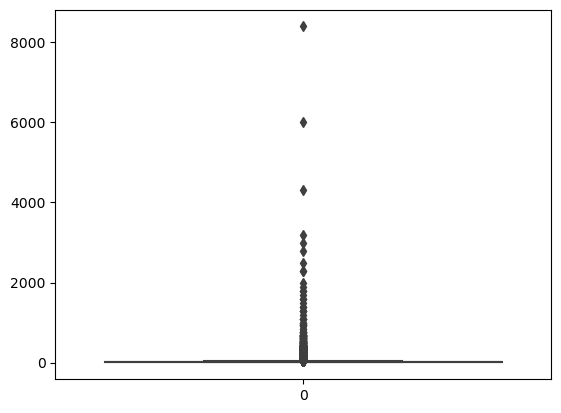

In [103]:
sns.boxplot(clean_data_new['Hits'])

In [104]:
# Treating the outliers in the target feature:
clean_data_new['Hits_log'] = np.log(clean_data_new['Hits'])

<Axes: >

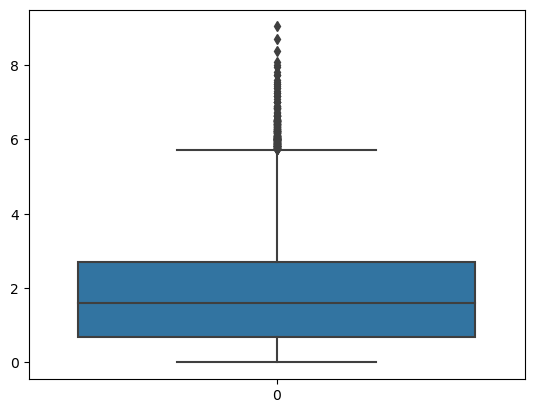

In [105]:
sns.boxplot(clean_data_new['Hits_log'])

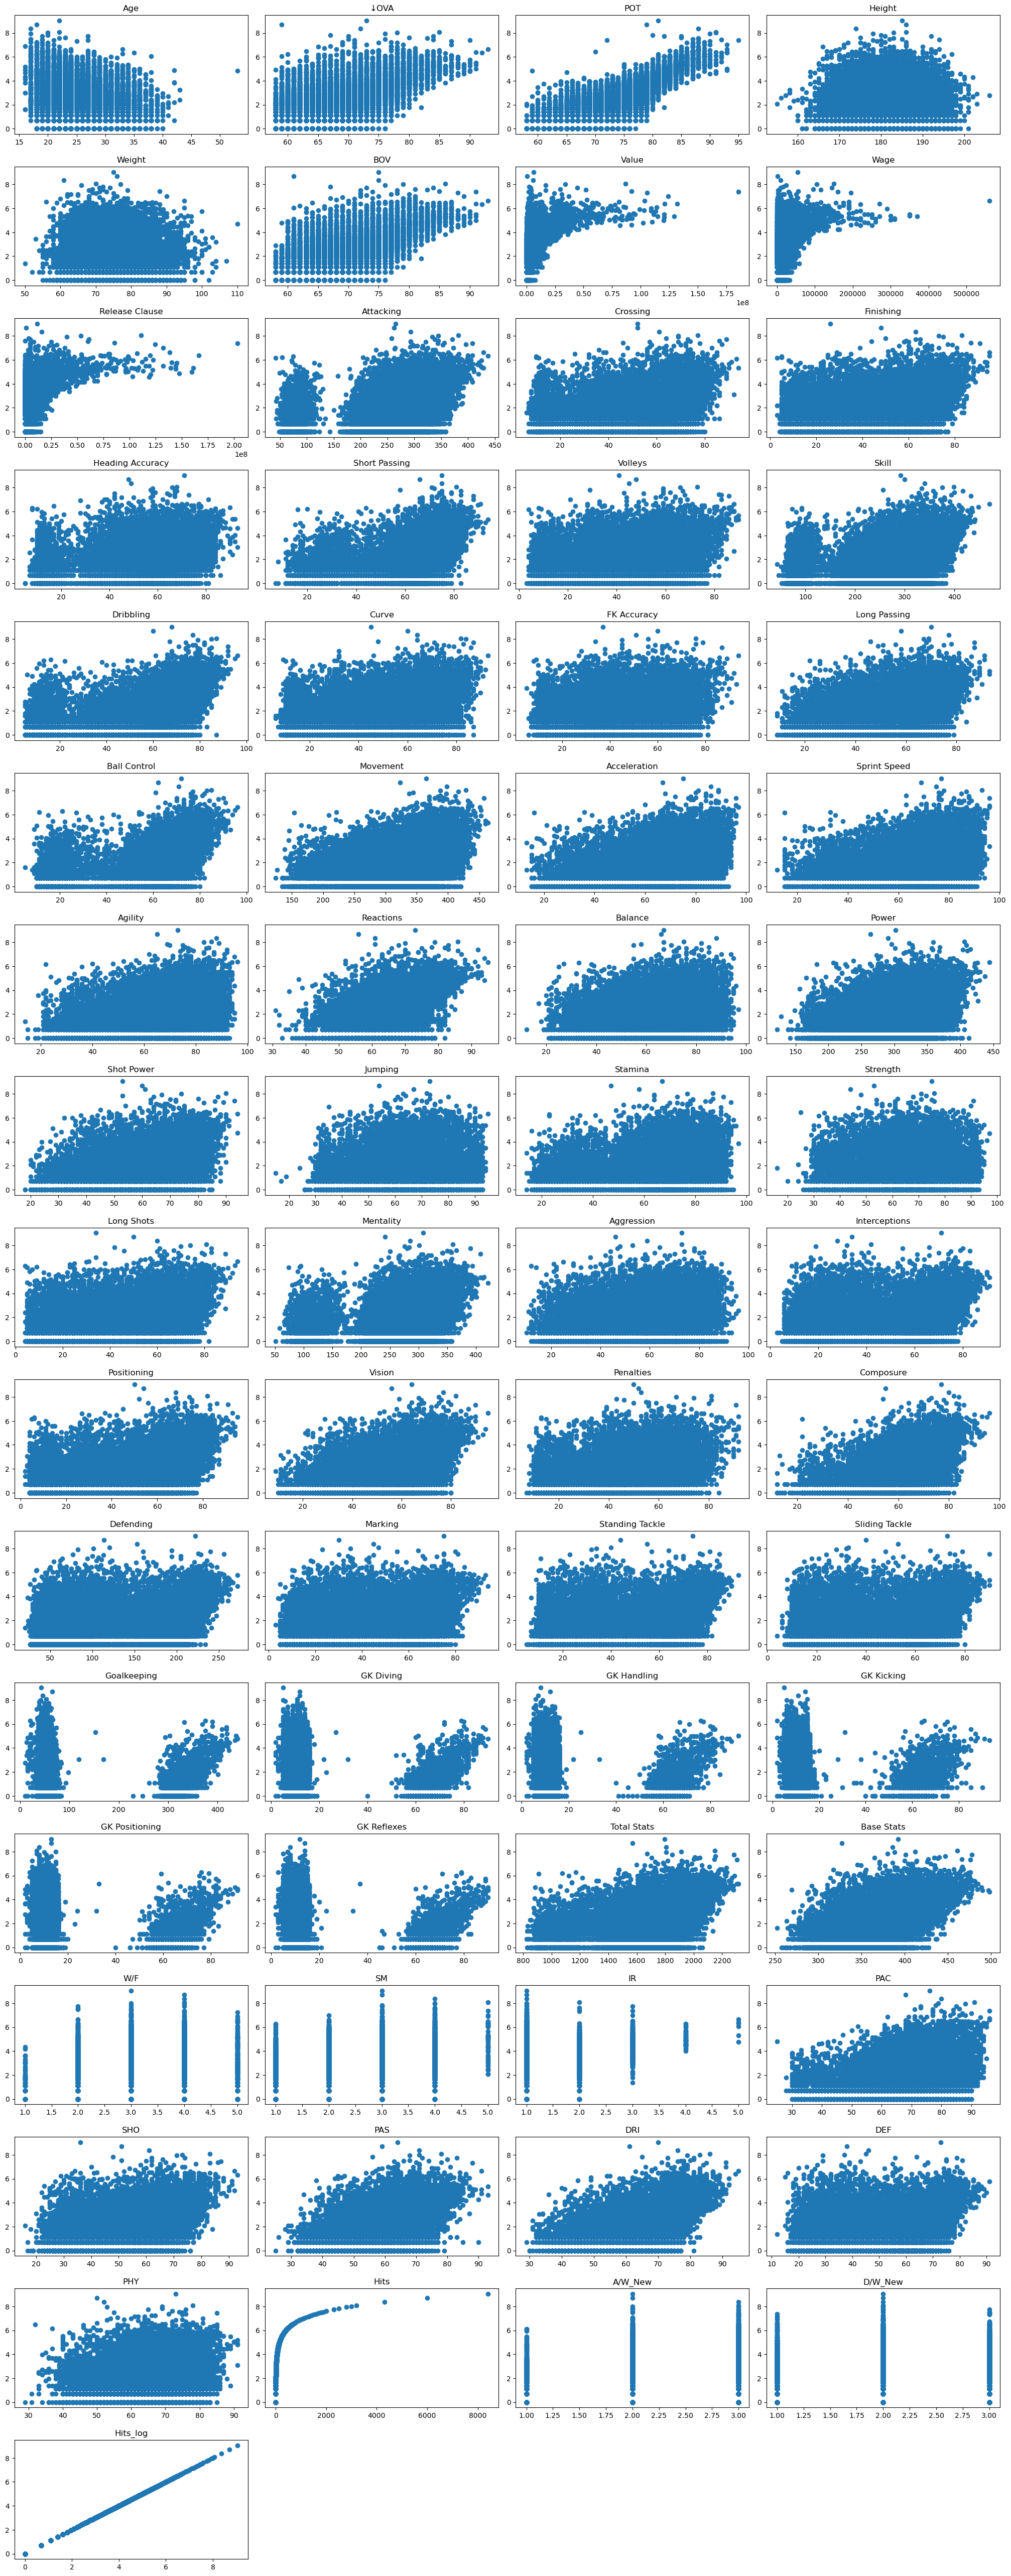

In [106]:
plt.figure(figsize=(20,60))
for features,entry in zip(clean_data_new.select_dtypes(exclude='object').columns,range(0,len(clean_data_new.columns))):
    plt.subplot(20,4,entry+1)
    plt.scatter(data=clean_data_new, x=features, y='Hits_log')
    plt.title(features)
plt.tight_layout(pad=0.2)
plt.show()

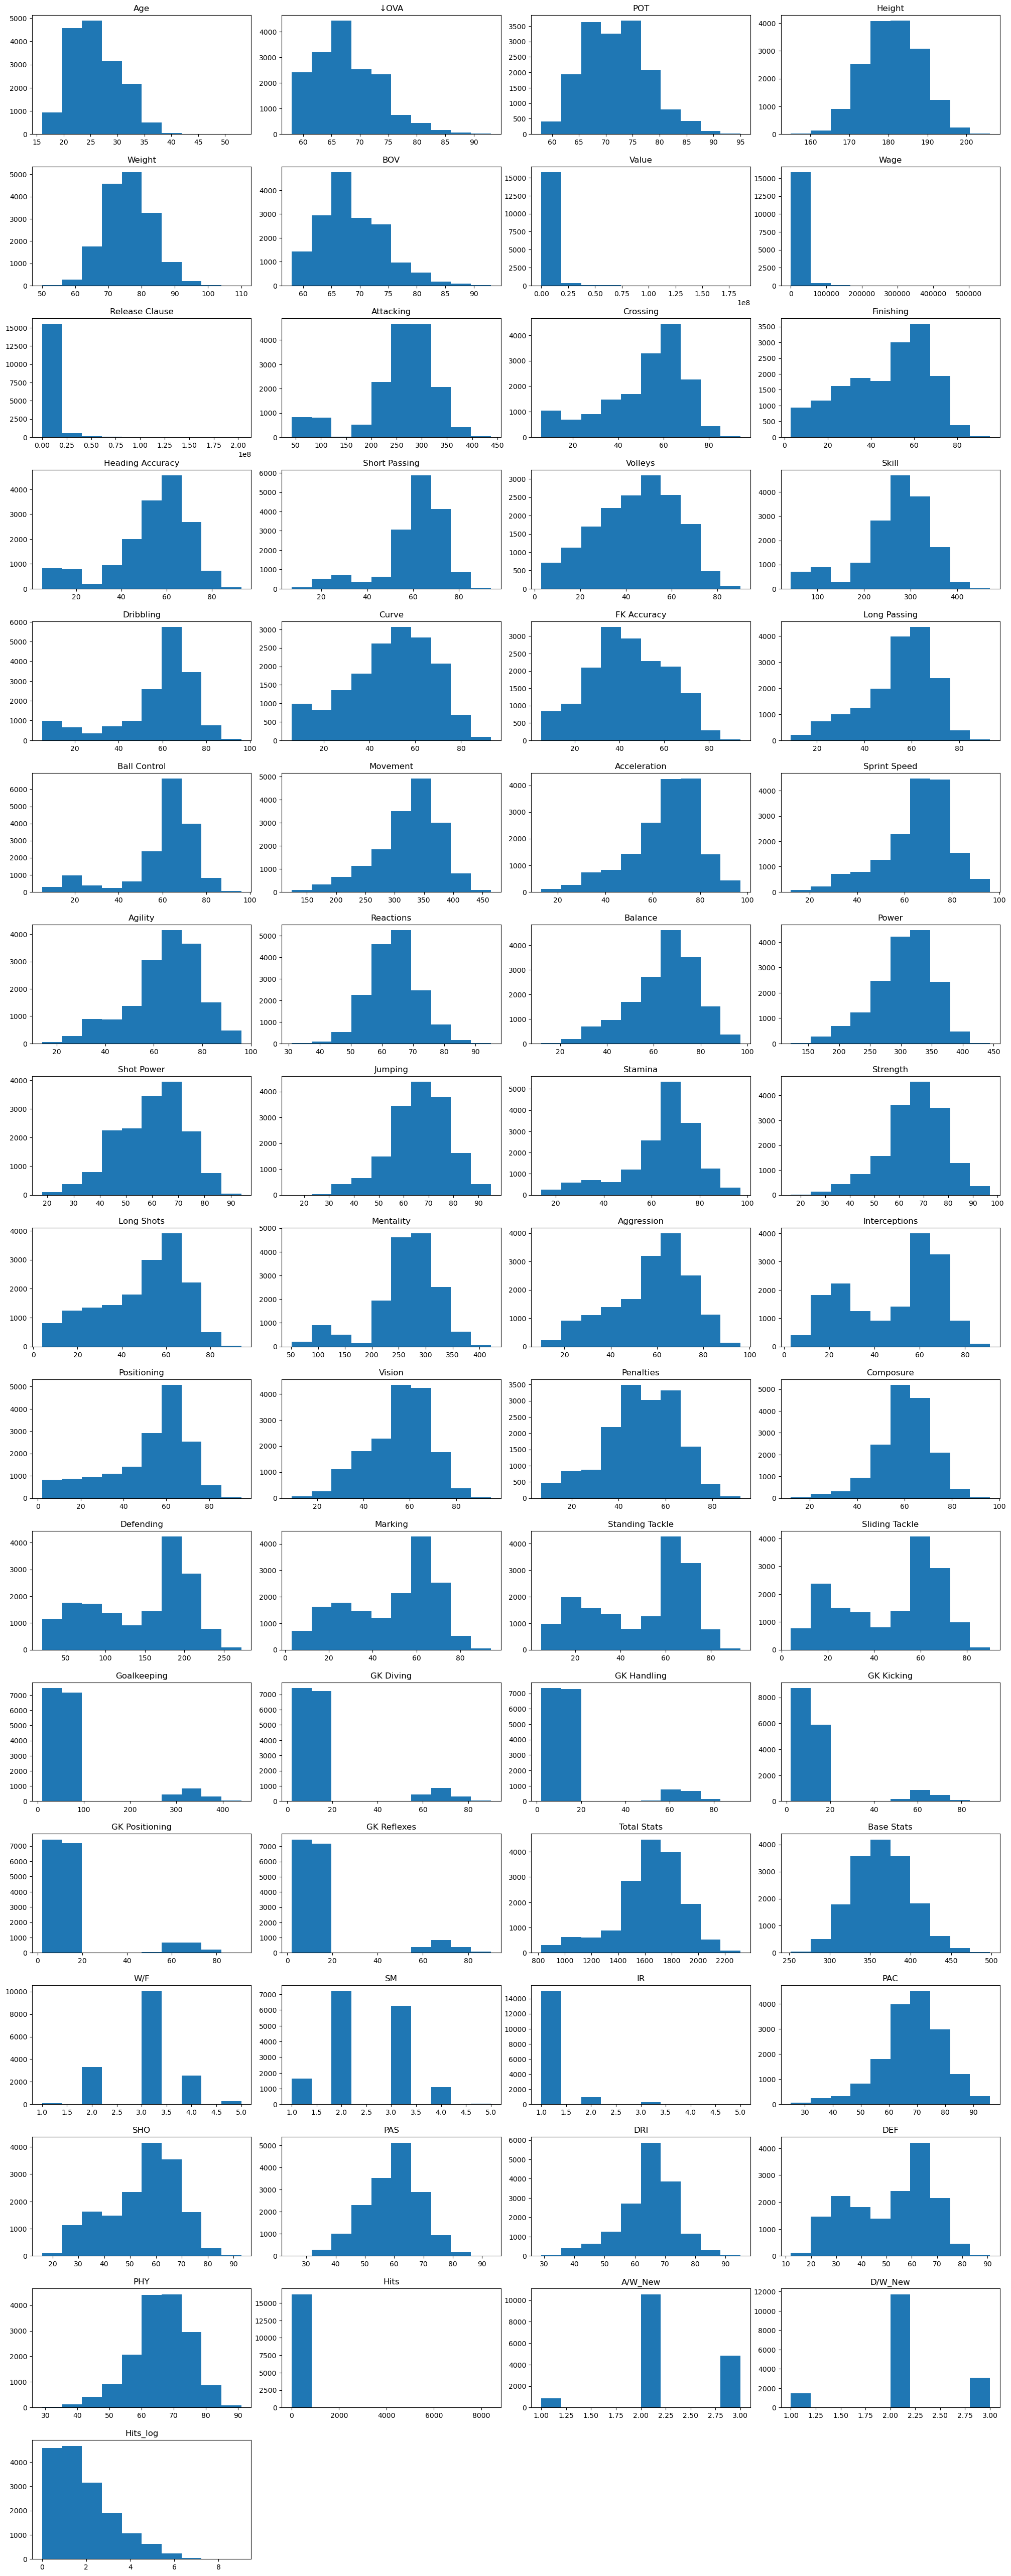

In [107]:
plt.figure(figsize=(20,60))
for features,entry in zip(clean_data_new.select_dtypes(exclude='object').columns,range(0,len(clean_data_new.columns))):
    plt.subplot(20,4,entry+1)
    plt.hist(data=clean_data_new, x=features)
    plt.title(features)
plt.tight_layout(pad=0.2)
plt.show()

<Figure size 800x1000 with 0 Axes>

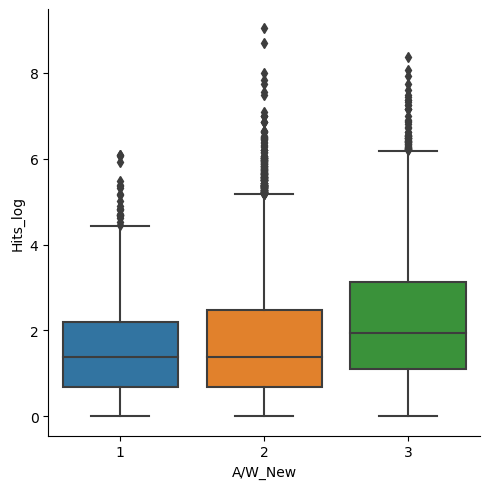

In [108]:
plt.figure(figsize=(8,10))
sns.catplot(data=clean_data_new, x='A/W_New',y='Hits_log', kind='box')

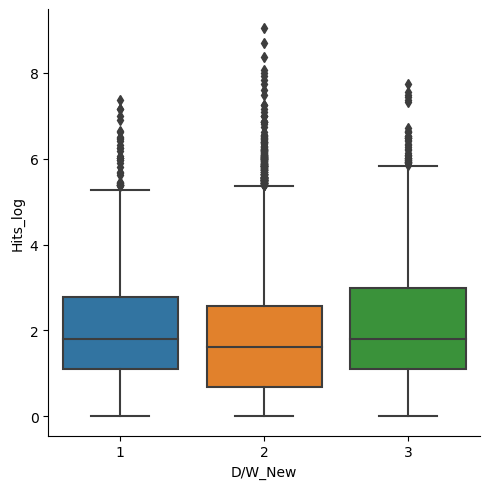

In [109]:
sns.catplot(data=clean_data_new, x='D/W_New',y='Hits_log', kind='box')
plt.show()

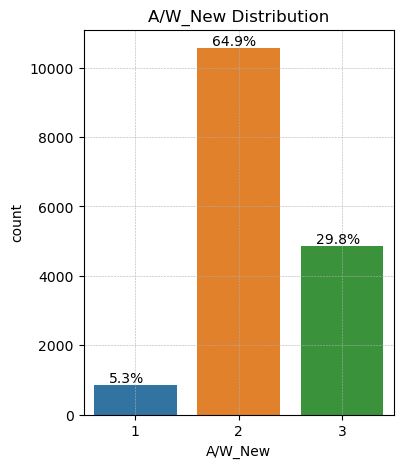

In [110]:
countplot_func(data=clean_data_new,main_data=clean_data_new,plot_size=(4,5),xlabel='A/W_New',
               plot_title='A/W_New Distribution',plot_variable='A/W_New',add_count=False)

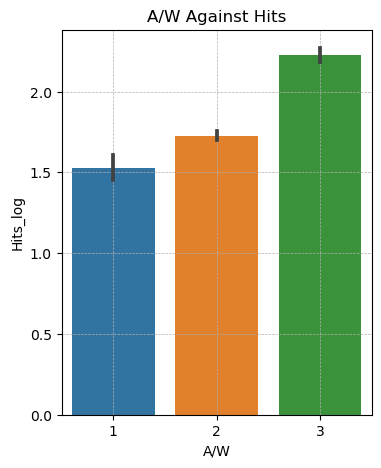

In [111]:
barplot_func(data=clean_data_new,main_data=clean_data_new,plot_size=(4,5),x='A/W_New',y='Hits_log',xlabel='A/W',
             plot_title='A/W Against Hits',plot_variable='A/W_New',add_count=False)
#sns.barplot(data=clean_data_new, x='A/W_New', y='Hits')

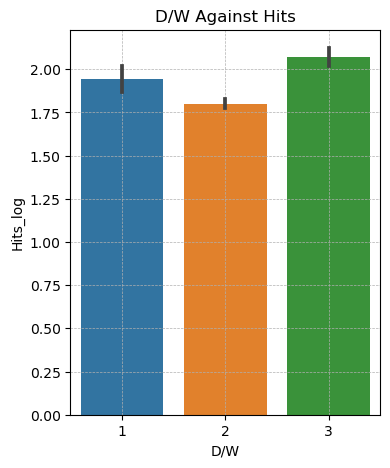

In [112]:
barplot_func(data=clean_data_new,main_data=clean_data_new,plot_size=(4,5),x='D/W_New',y='Hits_log',xlabel='D/W',
             plot_title='D/W Against Hits',plot_variable='D/W_New',add_count=False)

#### Outlier detection function:

In [113]:
def entry_limit(data, feature):
    q1, q3 = data[feature].quantile(0.25), data[feature].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    return round(upper, 2), round(lower, 2)

def treat_outliers_columns(data,feature_list):
    for feature in feature_list:
        Q_1= data[feature].quantile(0.25)
        Q_3 = data[feature].quantile(0.75)
        Iq_range = Q_3 - Q_1
        lower = Q_1 - (1.5 * Iq_range)
        upper = Q_3 + (1.5 * Iq_range)
        new_feature = np.clip(data[feature], lower, upper)
        data[feature] = new_feature
    return data

In [114]:
for col in clean_data_new.drop(['Hits'], axis=1).columns:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = entry_limit(clean_data_new, col)
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    percent_upper = round((len(clean_data_new[clean_data_new[col]>UL])/len(clean_data_new) * 100),2)
    percent_lower = round((len(clean_data_new[clean_data_new[col]<LL])/len(clean_data_new) * 100),2)
    
    total_outliers_percent = percent_upper + percent_lower
    
    print(f'Percentage of Outliers below Lower whisker = {percent_lower}%')
    print(f'Percentage of Outliers above Upper whisker = {percent_upper}%')
    print(f'Total Percentage of Outliers = {round(total_outliers_percent, 2)}%')
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: Age
Upper Limit = 39.5
Lower Limit = 11.5
Percentage of Outliers below Lower whisker = 0.0%
Percentage of Outliers above Upper whisker = 0.15%
Total Percentage of Outliers = 0.15%
-------------------------------------------------- 

--------------------------------------------------
Column: ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers below Lower whisker = 0.0%
Percentage of Outliers above Upper whisker = 0.87%
Total Percentage of Outliers = 0.87%
-------------------------------------------------- 

--------------------------------------------------
Column: POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers below Lower whisker = 0.0%
Percentage of Outliers above Upper whisker = 0.37%
Total Percentage of Outliers = 0.37%
-------------------------------------------------- 

--------------------------------------------------
Column: Height
Upper Limit = 201.0
Lower Limit = 161.0
Percentage of Out

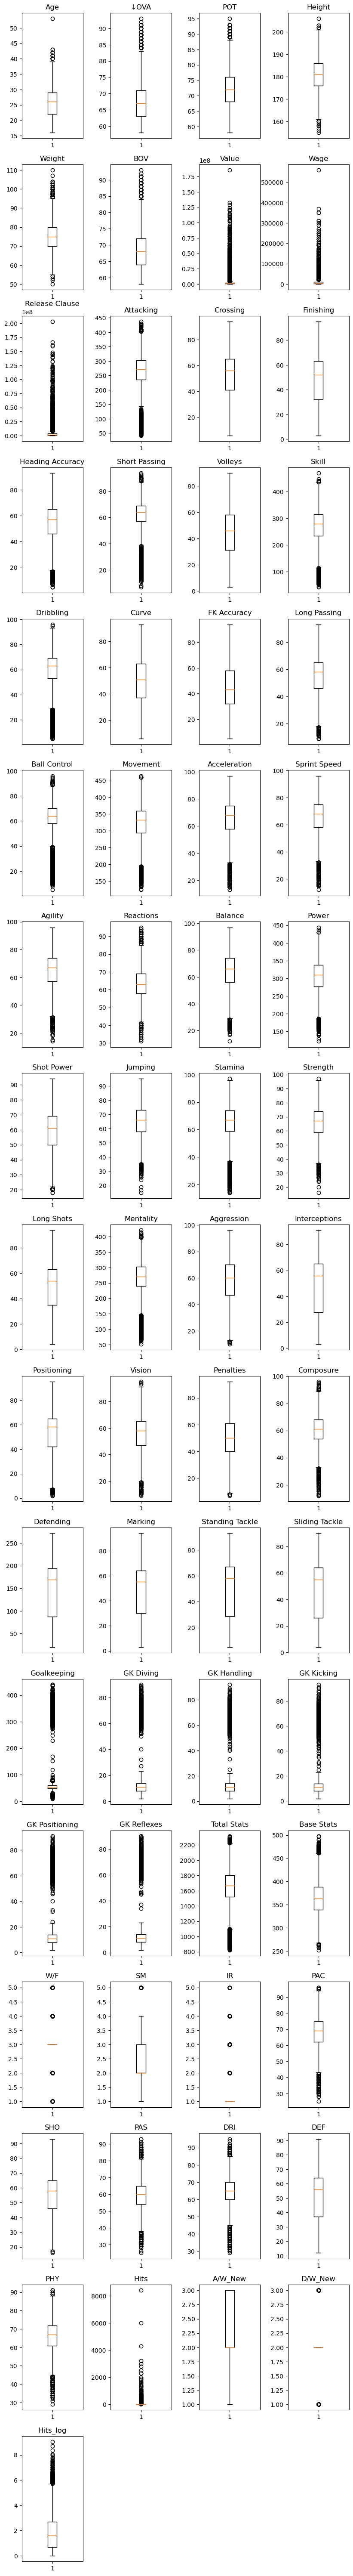

In [115]:
#Visualizing outliers in the data:
plt.figure(figsize=(8,70))
for features,entry in zip(clean_data_new.columns,range(0,len(clean_data_new.columns))):
    plt.subplot(20,4,entry+1)
    plt.boxplot(clean_data_new[features])
    plt.title(features)
plt.tight_layout(pad=0.1)
plt.show()

In [116]:
# Treating Outliers with clipping method:
clean_data_new = treat_outliers_columns(data=clean_data_new,
                                         feature_list=clean_data_new.drop(['W/F','SM','IR','A/W_New','D/W_New','Hits'],axis=1).columns)

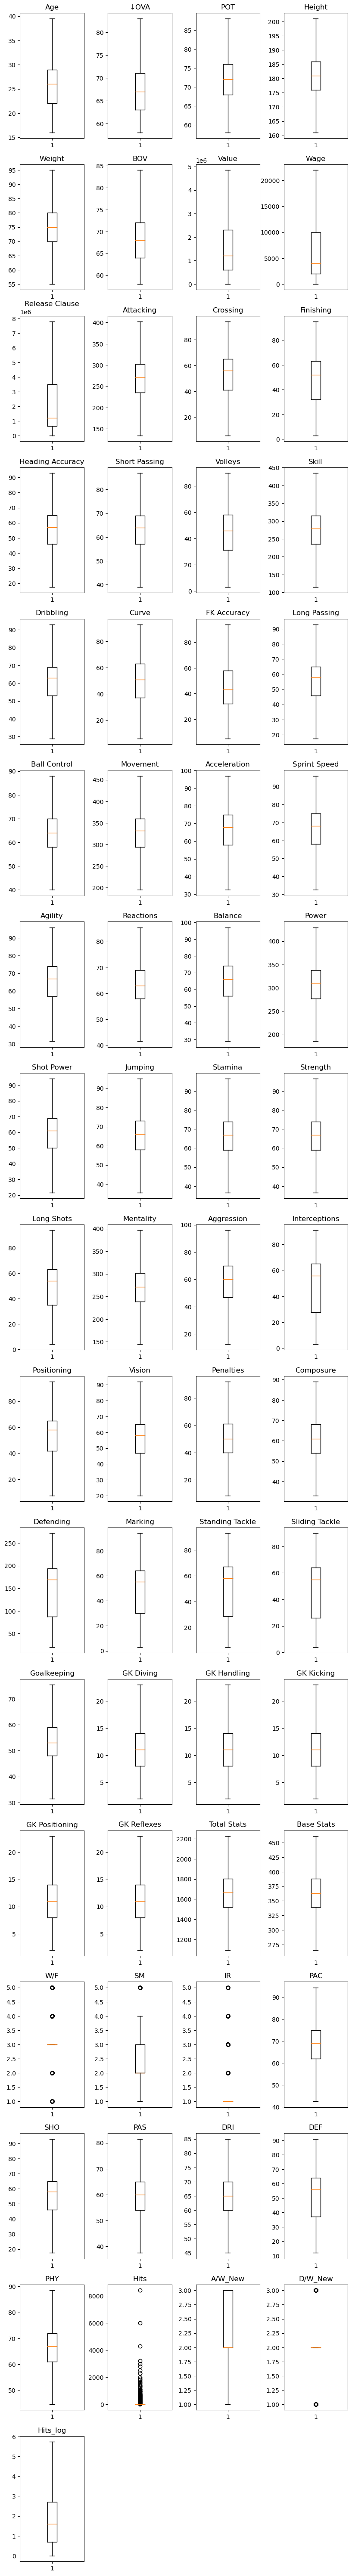

In [117]:
#Checking the outcome of the outlier treatment:
plt.figure(figsize=(8,70))
for features,entry in zip(clean_data_new.columns,range(0,len(clean_data_new.columns))):
    plt.subplot(20,4,entry+1)
    plt.boxplot(clean_data_new[features])
    plt.title(features)
plt.tight_layout(pad=0.1)
plt.show()

### Model Building:

#### Functions for building, training and evaluating the model:

In [118]:
def building_model(model,Xtrain_data,X_data,Ytrain_data):
    model.fit(Xtrain_data,Ytrain_data)
    prediction = model.predict(X_data)
    return prediction

def performance_evaluation(prediction_train,prediction_test,Ytrain_data,Ytest_data):
    # The mean absolute error
    mean_abs_train = mean_absolute_error(Ytrain_data,prediction_train)
    # The mean squared error
    mean_squared_train = mean_squared_error(Ytrain_data,prediction_train)
    
    
    mean_abs_test = mean_absolute_error(Ytest_data,prediction_test)
    # The mean squared error
    mean_squared_test = mean_squared_error(Ytest_data,prediction_test)

    perform_eval = pd.DataFrame({'MAE':[f'{mean_abs_train:.2f}',f'{mean_abs_test:.2f}'],\
                                 'MSE':[f'{mean_squared_train:.2f}',f'{mean_squared_test:.2f}'],\
                                 'RMSE':[f'{np.sqrt(mean_squared_train):.2f}',f'{np.sqrt(mean_squared_test):.2f}'],\
                               'R2_Score':[f'{r2_score(Ytrain_data,prediction_train):.2f}',f'{r2_score(Ytest_data,prediction_test):.2f}']},\
                                index=['Training','Testing'])
    return perform_eval

In [120]:
# Instance of the Regressors to be used:
linear = LinearRegression()
knn = KNeighborsRegressor()
rand_forest = RandomForestRegressor()

In [121]:
X = clean_data_new.drop(['Hits', 'Hits_log'], axis=1)
y = clean_data_new['Hits_log']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [123]:
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [124]:
X_train_s[0]

array([0.17021277, 0.08      , 0.46666667, 0.25      , 0.175     ,
       0.11538462, 0.12371134, 0.02272727, 0.06968552, 0.41604478,
       0.64367816, 0.44565217, 0.27152318, 0.39583333, 0.47126437,
       0.41875   , 0.453125  , 0.45348837, 0.35227273, 0.45578231,
       0.39583333, 0.59469697, 0.6744186 , 0.65354331, 0.64341085,
       0.21590909, 0.72058824, 0.24385246, 0.32413793, 0.44537815,
       0.43589744, 0.00833333, 0.39325843, 0.39880952, 0.4251497 ,
       0.52272727, 0.53142857, 0.55555556, 0.30538922, 0.33928571,
       0.46825397, 0.47777778, 0.47727273, 0.46511628, 0.21590909,
       0.23809524, 0.28571429, 0.61904762, 0.19047619, 0.14285714,
       0.37234982, 0.31377551, 0.25      , 0.25      , 0.        ,
       0.625     , 0.33774834, 0.42045455, 0.375     , 0.43037975,
       0.05681818, 0.5       , 0.5       ])

In [125]:
# Linear Regression:
prediction_train = building_model(linear,X_train_s,X_train_s,y_train)
prediction_test = building_model(linear,X_train_s,X_test_s,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytrain_data=y_train,Ytest_data=y_test)

MAE   MSE  RMSE R2_Score
Training  0.63  0.63  0.79     0.68
Testing   0.64  0.65  0.81     0.66

In [126]:
# K Nearest Neighbour Regression:
prediction_train = building_model(knn,X_train_s,X_train_s,y_train)
prediction_test = building_model(knn,X_train_s,X_test_s,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytrain_data=y_train,Ytest_data=y_test)

MAE   MSE  RMSE R2_Score
Training  0.58  0.54  0.73     0.73
Testing   0.72  0.83  0.91     0.57

In [127]:
# Random Forest Regression:
prediction_train = building_model(rand_forest,X_train_s,X_train_s,y_train)
prediction_test = building_model(rand_forest,X_train_s,X_test_s,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytrain_data=y_train,Ytest_data=y_test)

MAE   MSE  RMSE R2_Score
Training  0.21  0.07  0.27     0.96
Testing   0.58  0.53  0.73     0.73

In [130]:
# Hyperparameter Tuning on Random Forest model:
rand_forest2 = RandomForestRegressor(criterion = 'friedman_mse', max_depth = 8)

prediction_train = building_model(rand_forest2,X_train_s,X_train_s,y_train)
prediction_test = building_model(rand_forest2,X_train_s,X_test_s,y_train)
performance_evaluation(prediction_train=prediction_train,prediction_test=prediction_test,Ytrain_data=y_train,Ytest_data=y_test)

MAE   MSE  RMSE R2_Score
Training  0.52  0.44  0.66     0.78
Testing   0.58  0.54  0.73     0.72

In [131]:
rand_forest = RandomForestRegressor(max_depth=8, criterion='friedman_mse')
rand_forest.fit(X_train_s,y_train)
rand_forest.score(X_test_s,y_test)

0.7196590974166219

### Predicting Null Hits:

In [132]:
null_hits_df = null_hits_df.drop('Preferred Foot', axis=1)

In [133]:
null_hits_df

Age  ↓OVA   POT  Height  Weight  BOV     Value    Wage  Release Clause  \
16203   25  58.0  62.0     179    69.0   60  250000.0   500.0        244000.0   
16204   21  58.0  70.0     175    62.0   61  500000.0   750.0        334000.0   
16205   27  58.0  59.0     194    85.0   59  240000.0   650.0        229000.0   
16206   23  58.0  64.0     173    70.0   58  300000.0  2000.0        218000.0   
16208   30  58.0  58.0     183    76.0   58  170000.0   900.0        135000.0   
...    ...   ...   ...     ...     ...  ...       ...     ...             ...   
18974   21  47.0  55.0     178    66.0   49  100000.0  1000.0         70000.0   
18975   17  47.0  67.0     175    65.0   51  130000.0   500.0        165000.0   
18976   18  47.0  65.0     179    74.0   49  120000.0   500.0        131000.0   
18977   20  47.0  57.0     175    69.0   48  100000.0  2000.0         88000.0   
18978   21  47.0  57.0     188    75.0   50  100000.0  1000.0         79000.0   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
16203      233.0      51.0       42.0              57.0           50.0   
16204      237.0      54.0       46.0              41.0           60.0   
16205      256.0      32.0       59.0              60.0           53.0   
16206      191.0      53.0       26.0              42.0           50.0   
16208      178.0      27.0       22.0              54.0           48.0   
...          ...       ...        ...               ...            ...   
18974      145.0      23.0       26.0              43.0           26.0   
18975      211.0      38.0       42.0              40.0           56.0   
18976      200.0      30.0       34.0              43.0           54.0   
18977      215.0      45.0       52.0              34.0           42.0   
18978      163.0      40.0       18.0              40.0           45.0   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
16203     33.0  254.0       48.0   47.0         56.0          52.0   
16204     36.0  287.0       58.0   55.0         54.0          60.0   
16205     52.0  221.0       47.0   43.0         39.0          39.0   
16206     20.0  210.0       46.0   35.0         30.0          48.0   
16208     27.0  142.0       31.0   24.0         25.0          21.0   
...        ...    ...        ...    ...          ...           ...   
18974     27.0  142.0       27.0   23.0         21.0          29.0   
18975     35.0  219.0       46.0   40.0         35.0          50.0   
18976     39.0  207.0       43.0   39.0         31.0          47.0   
18977     42.0  194.0       51.0   35.0         31.0          31.0   
18978     20.0  171.0       40.0   33.0         20.0          40.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
16203          51.0     264.0          58.0          47.0     54.0       54.0   
16204          60.0     317.0          62.0          64.0     57.0       56.0   
16205          53.0     277.0          60.0          61.0     55.0       55.0   
16206          51.0     332.0          71.0          69.0     69.0       51.0   
16208          41.0     286.0          61.0          64.0     54.0       49.0   
...             ...       ...           ...           ...      ...        ...   
18974          42.0     294.0          68.0          60.0     69.0       46.0   
18975          48.0     305.0          63.0          64.0     61.0       51.0   
18976          47.0     290.0          59.0          66.0     51.0       47.0   
18977          46.0     254.0          62.0          55.0     50.0       33.0   
18978          38.0     279.0          60.0          63.0     57.0       47.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
16203     51.0  298.0        46.0     72.0     59.0      75.0        46.0   
16204     78.0  304.0        55.0     59.0     80.0      60.0        50.0   
16205     46.0  316.0        63.0     61.0     59.0      82.0        51.0   
16206     72.0  267.0  

In [134]:
# Encoding Categorical Variables:
null_cat = null_hits_df.select_dtypes(include='object')
for col in null_cat.columns:
    status_list = []
    for status in null_cat[col]:
        if status == 'Medium':
            status_list.append(2)
        elif status == 'High':
            status_list.append(3)
        else:
            status_list.append(1)
    null_cat[col + '_New'] = status_list
    
new_null_cat = null_cat.drop(['A/W','D/W'], axis=1)
    
null_hits_new = pd.concat([null_hits_df.drop(['A/W','D/W'], axis=1), new_null_cat], axis=1)
null_hits_new

Age  ↓OVA   POT  Height  Weight  BOV     Value    Wage  Release Clause  \
16203   25  58.0  62.0     179    69.0   60  250000.0   500.0        244000.0   
16204   21  58.0  70.0     175    62.0   61  500000.0   750.0        334000.0   
16205   27  58.0  59.0     194    85.0   59  240000.0   650.0        229000.0   
16206   23  58.0  64.0     173    70.0   58  300000.0  2000.0        218000.0   
16208   30  58.0  58.0     183    76.0   58  170000.0   900.0        135000.0   
...    ...   ...   ...     ...     ...  ...       ...     ...             ...   
18974   21  47.0  55.0     178    66.0   49  100000.0  1000.0         70000.0   
18975   17  47.0  67.0     175    65.0   51  130000.0   500.0        165000.0   
18976   18  47.0  65.0     179    74.0   49  120000.0   500.0        131000.0   
18977   20  47.0  57.0     175    69.0   48  100000.0  2000.0         88000.0   
18978   21  47.0  57.0     188    75.0   50  100000.0  1000.0         79000.0   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
16203      233.0      51.0       42.0              57.0           50.0   
16204      237.0      54.0       46.0              41.0           60.0   
16205      256.0      32.0       59.0              60.0           53.0   
16206      191.0      53.0       26.0              42.0           50.0   
16208      178.0      27.0       22.0              54.0           48.0   
...          ...       ...        ...               ...            ...   
18974      145.0      23.0       26.0              43.0           26.0   
18975      211.0      38.0       42.0              40.0           56.0   
18976      200.0      30.0       34.0              43.0           54.0   
18977      215.0      45.0       52.0              34.0           42.0   
18978      163.0      40.0       18.0              40.0           45.0   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
16203     33.0  254.0       48.0   47.0         56.0          52.0   
16204     36.0  287.0       58.0   55.0         54.0          60.0   
16205     52.0  221.0       47.0   43.0         39.0          39.0   
16206     20.0  210.0       46.0   35.0         30.0          48.0   
16208     27.0  142.0       31.0   24.0         25.0          21.0   
...        ...    ...        ...    ...          ...           ...   
18974     27.0  142.0       27.0   23.0         21.0          29.0   
18975     35.0  219.0       46.0   40.0         35.0          50.0   
18976     39.0  207.0       43.0   39.0         31.0          47.0   
18977     42.0  194.0       51.0   35.0         31.0          31.0   
18978     20.0  171.0       40.0   33.0         20.0          40.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
16203          51.0     264.0          58.0          47.0     54.0       54.0   
16204          60.0     317.0          62.0          64.0     57.0       56.0   
16205          53.0     277.0          60.0          61.0     55.0       55.0   
16206          51.0     332.0          71.0          69.0     69.0       51.0   
16208          41.0     286.0          61.0          64.0     54.0       49.0   
...             ...       ...           ...           ...      ...        ...   
18974          42.0     294.0          68.0          60.0     69.0       46.0   
18975          48.0     305.0          63.0          64.0     61.0       51.0   
18976          47.0     290.0          59.0          66.0     51.0       47.0   
18977          46.0     254.0          62.0          55.0     50.0       33.0   
18978          38.0     279.0          60.0          63.0     57.0       47.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
16203     51.0  298.0        46.0     72.0     59.0      75.0        46.0   
16204     78.0  304.0        55.0     59.0     80.0      60.0        50.0   
16205     46.0  316.0        63.0     61.0     59.0      82.0        51.0   
16206     72.0  267.0  

In [135]:
# Independent Variables:
X_features = null_hits_new.drop('Hits', axis=1)

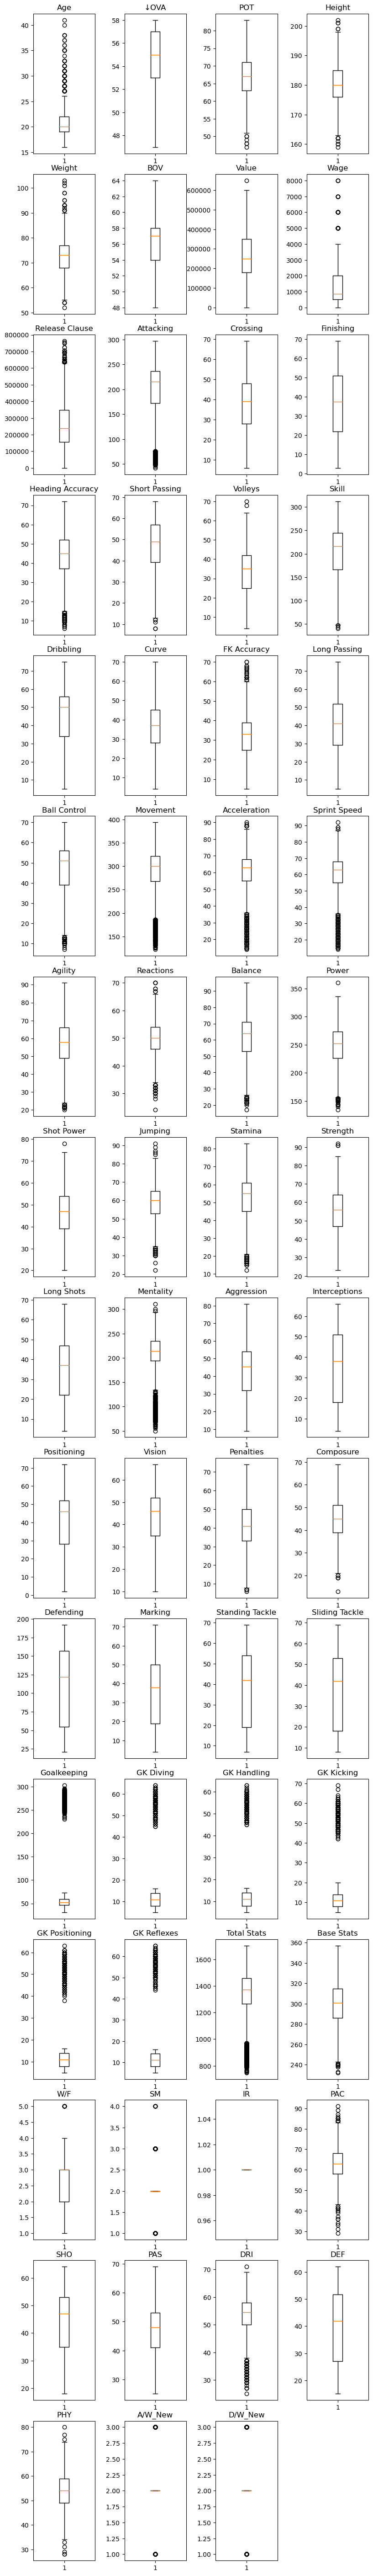

In [138]:
#Checking the outliers:
plt.figure(figsize=(8,70))
for features,entry in zip(X_features.columns,range(0,len(X_features.columns))):
    plt.subplot(20,4,entry+1)
    plt.boxplot(X_features[features])
    plt.title(features)
plt.tight_layout(pad=0.1)
plt.show()

In [139]:
X = X_features

In [140]:
# Normalizing the features:
scaler = MinMaxScaler()
X_pred = scaler.fit_transform(X)

In [141]:
X_pred

array([[0.36      , 1.        , 0.41666667, ..., 0.76923077, 0.5       ,
        0.5       ],
       [0.2       , 1.        , 0.63888889, ..., 0.67307692, 1.        ,
        1.        ],
       [0.44      , 1.        , 0.33333333, ..., 0.78846154, 0.5       ,
        0.5       ],
       ...,
       [0.08      , 0.        , 0.5       , ..., 0.48076923, 0.5       ,
        0.5       ],
       [0.16      , 0.        , 0.27777778, ..., 0.30769231, 0.5       ,
        0.5       ],
       [0.2       , 0.        , 0.27777778, ..., 0.51923077, 0.5       ,
        0.5       ]])

In [142]:
# Making Predictions:
hit_pred = rand_forest2.predict(X_pred)
hit_pred

array([1.1959043 , 2.5859109 , 1.24759475, ..., 1.47181531, 0.9031568 ,
       0.80884844])

In [143]:
# Finding the hits using exponential function (Note: the hits were initialy converted to logarithm form)
hits_predict = []
for hits in np.exp(hit_pred):
    hits_predict.append(round(hits, 0))

In [144]:
print(hits_predict)

[3.0, 13.0, 3.0, 5.0, 2.0, 19.0, 32.0, 9.0, 61.0, 8.0, 14.0, 11.0, 31.0, 22.0, 22.0, 17.0, 25.0, 9.0, 135.0, 10.0, 14.0, 45.0, 6.0, 3.0, 4.0, 10.0, 7.0, 9.0, 290.0, 10.0, 3.0, 89.0, 11.0, 8.0, 16.0, 3.0, 56.0, 11.0, 3.0, 3.0, 6.0, 19.0, 7.0, 7.0, 4.0, 8.0, 12.0, 18.0, 11.0, 29.0, 8.0, 3.0, 8.0, 32.0, 37.0, 5.0, 9.0, 18.0, 5.0, 5.0, 3.0, 7.0, 32.0, 14.0, 4.0, 66.0, 17.0, 15.0, 9.0, 10.0, 15.0, 6.0, 12.0, 10.0, 10.0, 18.0, 4.0, 9.0, 33.0, 5.0, 11.0, 3.0, 15.0, 3.0, 72.0, 33.0, 37.0, 33.0, 4.0, 16.0, 17.0, 4.0, 6.0, 21.0, 55.0, 3.0, 11.0, 5.0, 12.0, 7.0, 18.0, 9.0, 9.0, 3.0, 5.0, 10.0, 34.0, 2.0, 3.0, 56.0, 6.0, 6.0, 18.0, 32.0, 8.0, 4.0, 44.0, 4.0, 9.0, 9.0, 31.0, 35.0, 3.0, 11.0, 125.0, 11.0, 9.0, 3.0, 11.0, 8.0, 8.0, 6.0, 7.0, 20.0, 5.0, 5.0, 145.0, 3.0, 8.0, 3.0, 17.0, 11.0, 86.0, 4.0, 34.0, 7.0, 33.0, 6.0, 19.0, 5.0, 8.0, 16.0, 3.0, 23.0, 3.0, 4.0, 142.0, 33.0, 6.0, 15.0, 64.0, 19.0, 12.0, 4.0, 118.0, 5.0, 6.0, 11.0, 5.0, 8.0, 3.0, 9.0, 9.0, 59.0, 84.0, 63.0, 3.0, 14.0, 249.0, 7.0, 1

In [145]:
# Adding newly predicted Hits to the data
null_hits_df['Hits'] = hits_predict

In [146]:
null_hits_df

Age  ↓OVA   POT  Height  Weight  BOV     Value    Wage  Release Clause  \
16203   25  58.0  62.0     179    69.0   60  250000.0   500.0        244000.0   
16204   21  58.0  70.0     175    62.0   61  500000.0   750.0        334000.0   
16205   27  58.0  59.0     194    85.0   59  240000.0   650.0        229000.0   
16206   23  58.0  64.0     173    70.0   58  300000.0  2000.0        218000.0   
16208   30  58.0  58.0     183    76.0   58  170000.0   900.0        135000.0   
...    ...   ...   ...     ...     ...  ...       ...     ...             ...   
18974   21  47.0  55.0     178    66.0   49  100000.0  1000.0         70000.0   
18975   17  47.0  67.0     175    65.0   51  130000.0   500.0        165000.0   
18976   18  47.0  65.0     179    74.0   49  120000.0   500.0        131000.0   
18977   20  47.0  57.0     175    69.0   48  100000.0  2000.0         88000.0   
18978   21  47.0  57.0     188    75.0   50  100000.0  1000.0         79000.0   

       Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  \
16203      233.0      51.0       42.0              57.0           50.0   
16204      237.0      54.0       46.0              41.0           60.0   
16205      256.0      32.0       59.0              60.0           53.0   
16206      191.0      53.0       26.0              42.0           50.0   
16208      178.0      27.0       22.0              54.0           48.0   
...          ...       ...        ...               ...            ...   
18974      145.0      23.0       26.0              43.0           26.0   
18975      211.0      38.0       42.0              40.0           56.0   
18976      200.0      30.0       34.0              43.0           54.0   
18977      215.0      45.0       52.0              34.0           42.0   
18978      163.0      40.0       18.0              40.0           45.0   

       Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
16203     33.0  254.0       48.0   47.0         56.0          52.0   
16204     36.0  287.0       58.0   55.0         54.0          60.0   
16205     52.0  221.0       47.0   43.0         39.0          39.0   
16206     20.0  210.0       46.0   35.0         30.0          48.0   
16208     27.0  142.0       31.0   24.0         25.0          21.0   
...        ...    ...        ...    ...          ...           ...   
18974     27.0  142.0       27.0   23.0         21.0          29.0   
18975     35.0  219.0       46.0   40.0         35.0          50.0   
18976     39.0  207.0       43.0   39.0         31.0          47.0   
18977     42.0  194.0       51.0   35.0         31.0          31.0   
18978     20.0  171.0       40.0   33.0         20.0          40.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
16203          51.0     264.0          58.0          47.0     54.0       54.0   
16204          60.0     317.0          62.0          64.0     57.0       56.0   
16205          53.0     277.0          60.0          61.0     55.0       55.0   
16206          51.0     332.0          71.0          69.0     69.0       51.0   
16208          41.0     286.0          61.0          64.0     54.0       49.0   
...             ...       ...           ...           ...      ...        ...   
18974          42.0     294.0          68.0          60.0     69.0       46.0   
18975          48.0     305.0          63.0          64.0     61.0       51.0   
18976          47.0     290.0          59.0          66.0     51.0       47.0   
18977          46.0     254.0          62.0          55.0     50.0       33.0   
18978          38.0     279.0          60.0          63.0     57.0       47.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
16203     51.0  298.0        46.0     72.0     59.0      75.0        46.0   
16204     78.0  304.0        55.0     59.0     80.0      60.0        50.0   
16205     46.0  316.0        63.0     61.0     59.0      82.0        51.0   
16206     72.0  267.0  

- Null Hits values predicted and added the table.